# 개인 프로젝트
### Data : Mobile Device Usage and User Behavior Dataset

## 데이터 로드

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mac 폰트
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

# 데이터 새로 로드
df = pd.read_csv('user_behavior_dataset.csv')

In [182]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


## 전처리 시작

In [183]:
print("=== 📊 전처리 시작 ===\n")
print(f"원본 shape: {df.shape}")
print(f"결측치: {df.isnull().sum().sum()}개\n")

# 인코딩 
df['Operating System'] = df['Operating System'].map({'iOS': 1, 'Android': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

=== 📊 전처리 시작 ===

원본 shape: (700, 11)
결측치: 0개



In [184]:
print(df['Operating System'].unique())
print(df['Gender'].unique())

[0 1]
[1 0]


In [185]:
df.head(10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,0,393,6.4,1872,67,1122,40,1,4
1,2,OnePlus 9,0,268,4.7,1331,42,944,47,0,3
2,3,Xiaomi Mi 11,0,154,4.0,761,32,322,42,1,2
3,4,Google Pixel 5,0,239,4.8,1676,56,871,20,1,3
4,5,iPhone 12,1,187,4.3,1367,58,988,31,0,3
5,6,Google Pixel 5,0,99,2.0,940,35,564,31,1,2
6,7,Samsung Galaxy S21,0,350,7.3,1802,66,1054,21,0,4
7,8,OnePlus 9,0,543,11.4,2956,82,1702,31,1,5
8,9,Samsung Galaxy S21,0,340,7.7,2138,75,1053,42,0,4
9,10,iPhone 12,1,424,6.6,1957,75,1301,42,1,4


## 기본 분석 및 기초 통계 분석

In [186]:
# 기본 정보
print('-'*20, '기본 정보', '-'*20)
df.info() # info() 안에서 자동으로 print를 진행

# 기초 통계량
summary_statistics = df.describe(include='all').round(1)
print('-'*20, '기초 통계량', '-'*20)
print(summary_statistics)

-------------------- 기본 정보 --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    int64  
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    int64  
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 60.3+ KB
-------------------- 기초 통계량 ---------------

## 이상치 확인

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mac 폰트
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

# 수치형 변수
numerical_cols = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                  'Battery Drain (mAh/day)', 'Number of Apps Installed', 
                  'Data Usage (MB/day)', 'Age']

### 1. 박스플롯

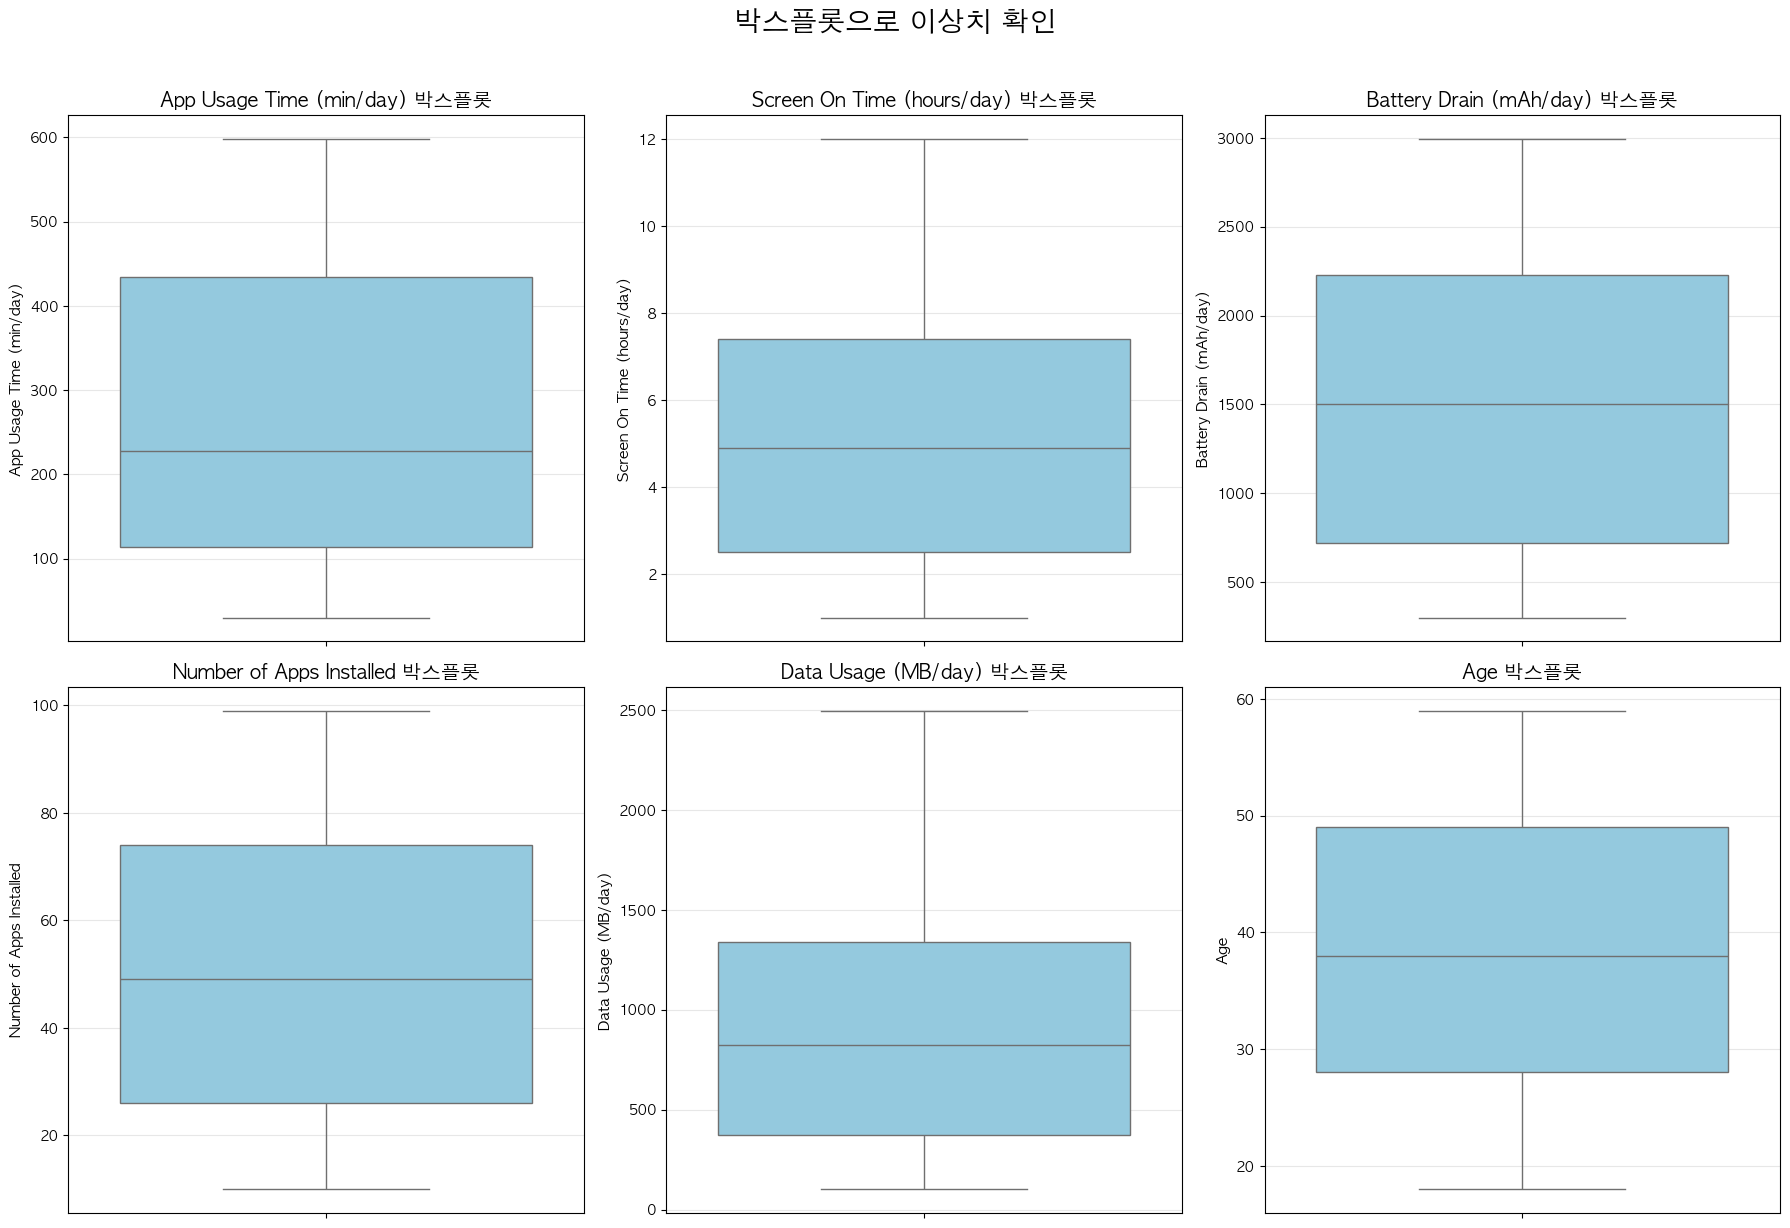

In [188]:
# 박스플롯
plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'{col} 박스플롯', fontsize=14, fontweight='bold')
    plt.ylabel(col, fontsize=11)
    plt.grid(axis='y', alpha=0.3)

plt.suptitle('박스플롯으로 이상치 확인', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 2.IQR 이상치 탐지

In [189]:
# 이상치 탐지 함수
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"\n[{column}]")
    print(f"  Q1 (25%): {Q1:.2f}")
    print(f"  Q3 (75%): {Q3:.2f}")
    print(f"  IQR: {IQR:.2f}")
    print(f"  하한: {lower_bound:.2f}")
    print(f"  상한: {upper_bound:.2f}")
    print(f"  이상치: {len(outliers)}개 ({len(outliers)/len(df)*100:.2f}%)")
    
    return outliers

print("=" * 60)
print("IQR 기반 이상치 탐지")
print("=" * 60)

outlier_dict = {}

for col in numerical_cols:
    outlier_dict[col] = detect_outliers_iqr(df, col)

print("\n" + "=" * 60)

IQR 기반 이상치 탐지

[App Usage Time (min/day)]
  Q1 (25%): 113.25
  Q3 (75%): 434.25
  IQR: 321.00
  하한: -368.25
  상한: 915.75
  이상치: 0개 (0.00%)

[Screen On Time (hours/day)]
  Q1 (25%): 2.50
  Q3 (75%): 7.40
  IQR: 4.90
  하한: -4.85
  상한: 14.75
  이상치: 0개 (0.00%)

[Battery Drain (mAh/day)]
  Q1 (25%): 722.25
  Q3 (75%): 2229.50
  IQR: 1507.25
  하한: -1538.62
  상한: 4490.38
  이상치: 0개 (0.00%)

[Number of Apps Installed]
  Q1 (25%): 26.00
  Q3 (75%): 74.00
  IQR: 48.00
  하한: -46.00
  상한: 146.00
  이상치: 0개 (0.00%)

[Data Usage (MB/day)]
  Q1 (25%): 373.00
  Q3 (75%): 1341.00
  IQR: 968.00
  하한: -1079.00
  상한: 2793.00
  이상치: 0개 (0.00%)

[Age]
  Q1 (25%): 28.00
  Q3 (75%): 49.00
  IQR: 21.00
  하한: -3.50
  상한: 80.50
  이상치: 0개 (0.00%)



### 3. 이상치 요약 테이블

In [190]:
# 이상치 개수 요약
import pandas as pd

outlier_summary = []

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    outlier_summary.append({
        '변수': col,
        '이상치 개수': len(outliers),
        '이상치 비율(%)': f"{len(outliers)/len(df)*100:.2f}",
        '하한': f"{lower:.2f}",
        '상한': f"{upper:.2f}"
    })

outlier_df = pd.DataFrame(outlier_summary)
print("\n이상치 요약 테이블")
print("=" * 80)
print(outlier_df.to_string(index=False))


이상치 요약 테이블
                        변수  이상치 개수 이상치 비율(%)       하한      상한
  App Usage Time (min/day)       0      0.00  -368.25  915.75
Screen On Time (hours/day)       0      0.00    -4.85   14.75
   Battery Drain (mAh/day)       0      0.00 -1538.62 4490.38
  Number of Apps Installed       0      0.00   -46.00  146.00
       Data Usage (MB/day)       0      0.00 -1079.00 2793.00
                       Age       0      0.00    -3.50   80.50


### 4. 히스토그램 + 경계선

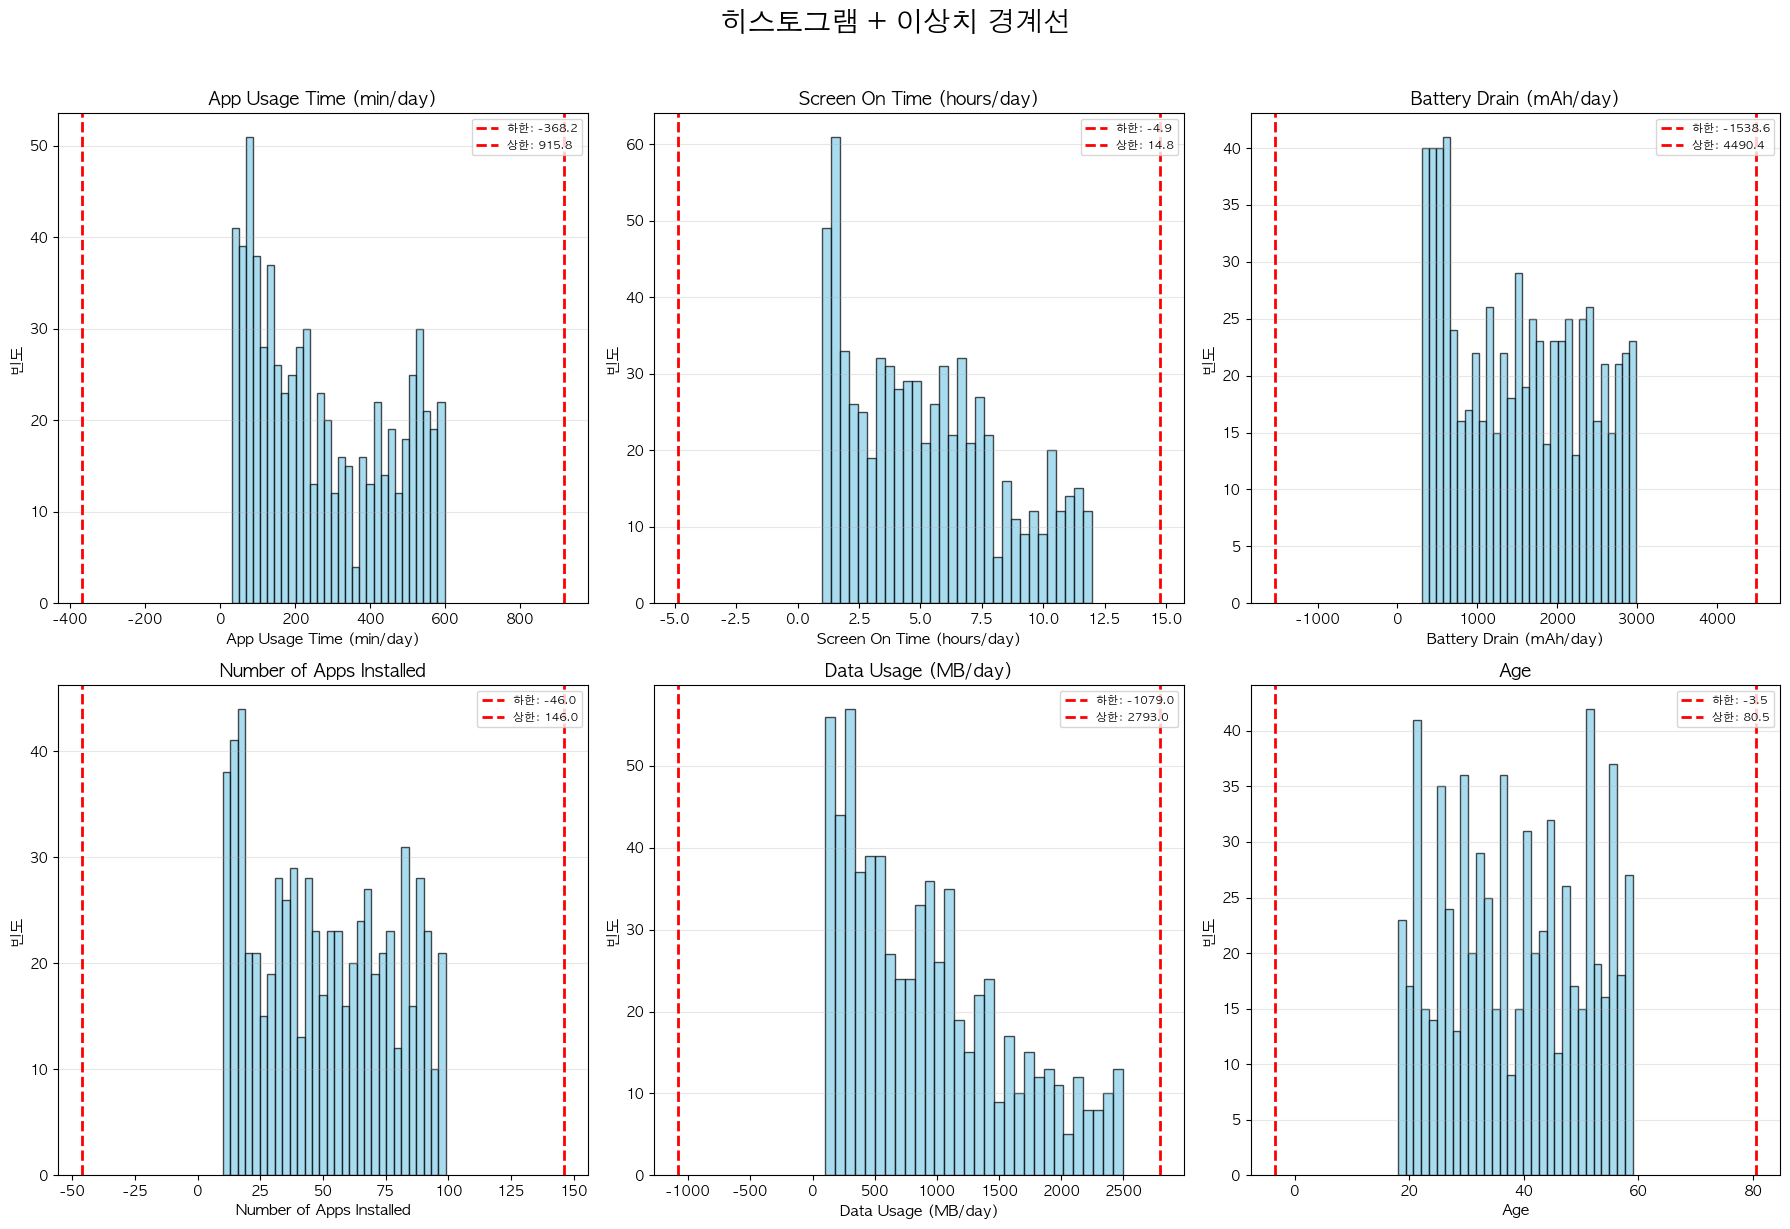

In [191]:
# 히스토그램에 이상치 경계선 표시
plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    
    # 히스토그램
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    
    # IQR 계산
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # 경계선 표시
    plt.axvline(lower, color='red', linestyle='--', linewidth=2, label=f'하한: {lower:.1f}')
    plt.axvline(upper, color='red', linestyle='--', linewidth=2, label=f'상한: {upper:.1f}')
    
    plt.title(f'{col}', fontsize=13, fontweight='bold')
    plt.xlabel(col, fontsize=11)
    plt.ylabel('빈도', fontsize=11)
    plt.legend(loc='upper right', fontsize=8)
    plt.grid(axis='y', alpha=0.3)

plt.suptitle('히스토그램 + 이상치 경계선', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 분석

## 수치형 데이터 시각화

### 상관관계 분석

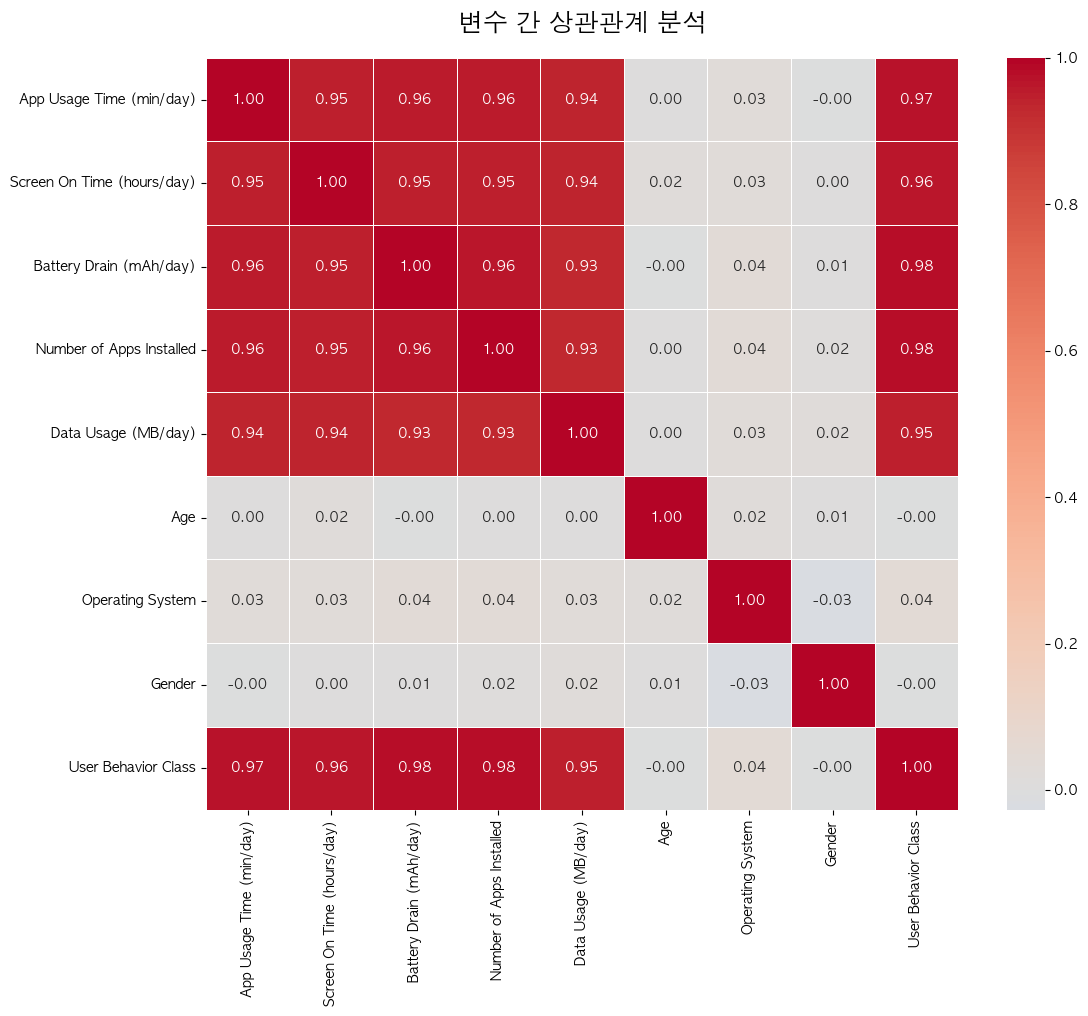

In [192]:
# 상관관계 히트맵
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

# 수치형 변수만 선택
numerical_cols = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                  'Battery Drain (mAh/day)', 'Number of Apps Installed', 
                  'Data Usage (MB/day)', 'Age', 
                  'Operating System', 'Gender', 'User Behavior Class']

# 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), 
            annot=True, 
            fmt='.2f',
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5)
plt.title('변수 간 상관관계 분석', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### Class별 평균값 비교

### 🔥 핵심 발견사항 정리
1️⃣ 초강한 상관관계 그룹 (0.93~0.98)

📱 모바일 사용 핵심 지표들이 하나의 클러스터 형성:
App Usage Time,
Screen On Time,
Battery Drain,
Apps Installed,
Data Usage
 → 0.95~0.98 강한 양의 상관
 
User Behavior Class (거의 완벽한 상관!)

해석: 앱 사용시간 ↑ → 화면 켜진 시간 ↑ → 배터리 소모 ↑ → 데이터 사용 ↑
모두 연쇄 반응처럼 움직임 (당연하지만 수치로 증명!)


2️⃣ User Behavior Class = 종합 지표!
User Behavior Class 상관계수:
- App Usage Time: 0.97 ⭐
- Battery Drain: 0.98 ⭐
- Apps Installed: 0.98 ⭐
- Data Usage: 0.95 ⭐

3️⃣ 무관한 변수들 (≈0.00)
❌ Age, Gender, Operating System
   → 사용 패턴과 거의 무관!

In [193]:
# Class별 평균값 비교
df.groupby('User Behavior Class')[
    ['App Usage Time (min/day)', 'Battery Drain (mAh/day)', 
     'Number of Apps Installed', 'Data Usage (MB/day)']
].mean().round()

,App Usage Time (min/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day)
User Behavior Class,,,,
1,60.0,455.0,15.0,202.0
2,132.0,884.0,31.0,451.0
3,235.0,1515.0,50.0,822.0
4,396.0,2106.0,70.0,1232.0
5,541.0,2701.0,89.0,1975.0


## 추가 분석

### 1️⃣ User Behavior Class 프로파일 분석

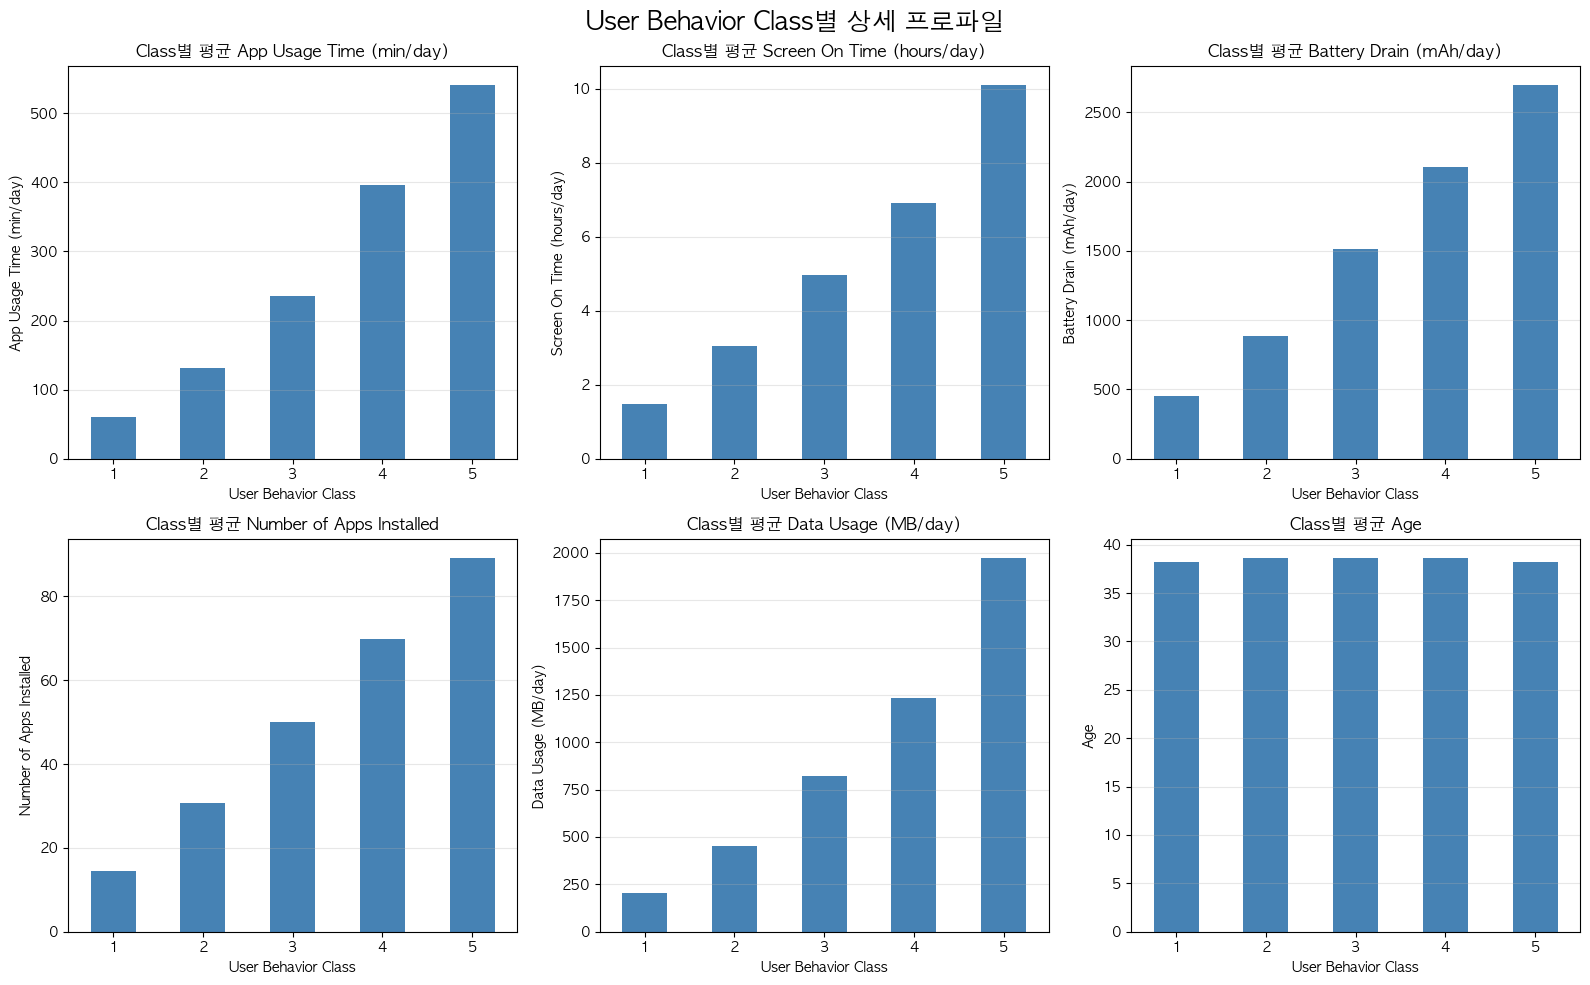

In [194]:
# Class별 상세 비교
plt.figure(figsize=(16, 10))

metrics = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
           'Battery Drain (mAh/day)', 'Number of Apps Installed', 
           'Data Usage (MB/day)', 'Age']

for i, col in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    df.groupby('User Behavior Class')[col].mean().plot(kind='bar', color='steelblue')
    plt.title(f'Class별 평균 {col}', fontsize=12, fontweight='bold')
    plt.xlabel('User Behavior Class')
    plt.ylabel(col)
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)

plt.suptitle('User Behavior Class별 상세 프로파일', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

### 2️⃣ OS/Gender별 분포 확인 (무관성 검증)

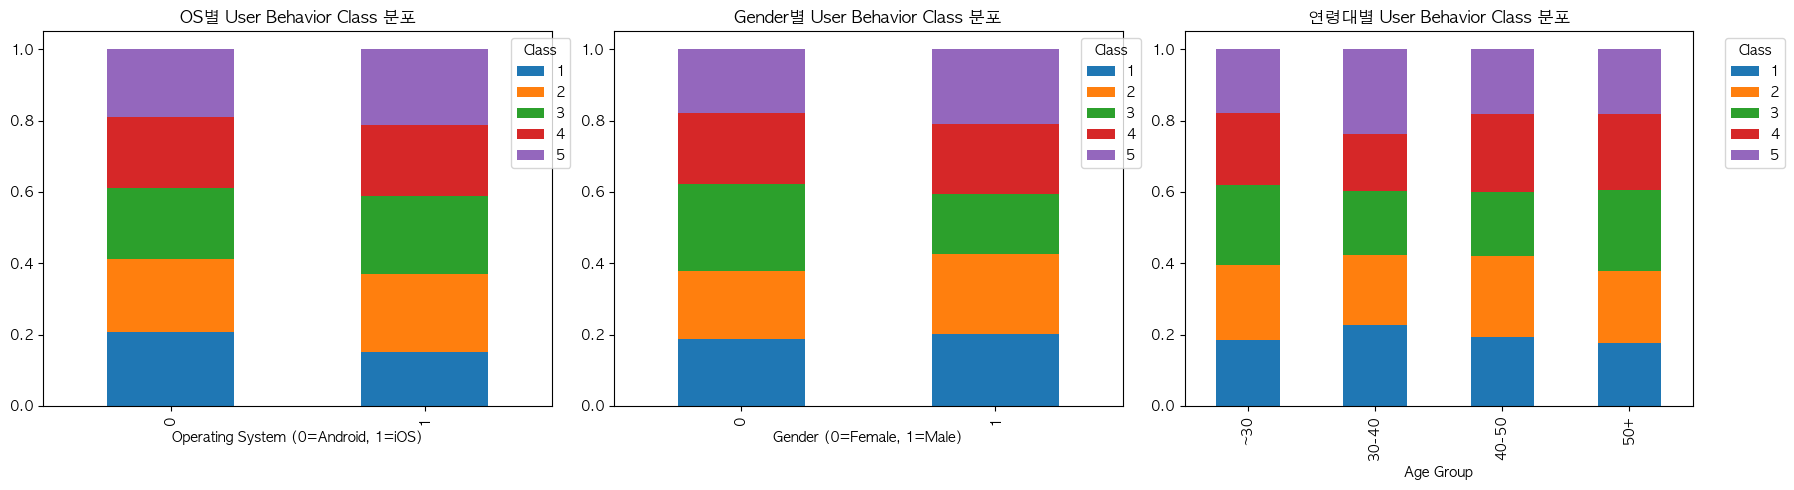

In [195]:
# 카테고리 변수 분포
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# OS별 User Behavior Class 분포
pd.crosstab(df['Operating System'], df['User Behavior Class'], 
            normalize='index').plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('OS별 User Behavior Class 분포')
axes[0].set_xlabel('Operating System (0=Android, 1=iOS)')
axes[0].legend(title='Class', bbox_to_anchor=(1.05, 1))

# Gender별 User Behavior Class 분포
pd.crosstab(df['Gender'], df['User Behavior Class'], 
            normalize='index').plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Gender별 User Behavior Class 분포')
axes[1].set_xlabel('Gender (0=Female, 1=Male)')
axes[1].legend(title='Class', bbox_to_anchor=(1.05, 1))

# Age 그룹별
df['age_group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 100], 
                          labels=['~30', '30-40', '40-50', '50+'])
pd.crosstab(df['age_group'], df['User Behavior Class'], 
            normalize='index').plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('연령대별 User Behavior Class 분포')
axes[2].set_xlabel('Age Group')
axes[2].legend(title='Class', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

In [196]:
# 30-40세 그룹의 Class 5 비율 확인
age_class_dist = pd.crosstab(df['age_group'], df['User Behavior Class'], 
                               normalize='index') * 100

print("연령대별 Class 5 비율:")
print(age_class_dist[5].sort_values(ascending=False))

# 30-40세 특성 분석
age_30_40 = df[(df['Age'] >= 30) & (df['Age'] < 40)]
print(f"\n30-40세 그룹:")
print(f"  Class 5 비율: {(age_30_40['User Behavior Class']==5).mean()*100:.1f}%")
print(f"  Class 4 비율: {(age_30_40['User Behavior Class']==4).mean()*100:.1f}%")

연령대별 Class 5 비율:
age_group
30-40    23.809524
50+      18.238994
40-50    18.064516
~30      17.889908
Name: 5, dtype: float64

30-40세 그룹:
  Class 5 비율: 24.4%
  Class 4 비율: 14.0%


### 🔥 핵심 발견 확정
30대가 Heavy User 비율 1위!
연령대별 Heavy User(Class 5) 비율:

- 1위 🥇 30-40세:  23.8% (24.4%)
- 2위 🥈 50세+:    18.2%
- 3위 🥉 40-50세:  18.1%
- 4위    ~30세:    17.9%

→ 30대가 다른 연령대보다 약 6%p 높음!
   (30% 더 많은 Heavy User 보유)
### 추가 발견:
30-40세 그룹:
- Class 5 (Heavy):  24.4% ⭐
- Class 4 (Medium): 14.0%
  
→ Class 4가 비정상적으로 낮음!
  (다른 연령대는 보통 18~20%)
  
해석: 30대는 "중간 사용자"가 적고
      Light → Medium → Heavy로 건너뛰어 이동

### 모의 Retention 분석 ⭐⭐⭐

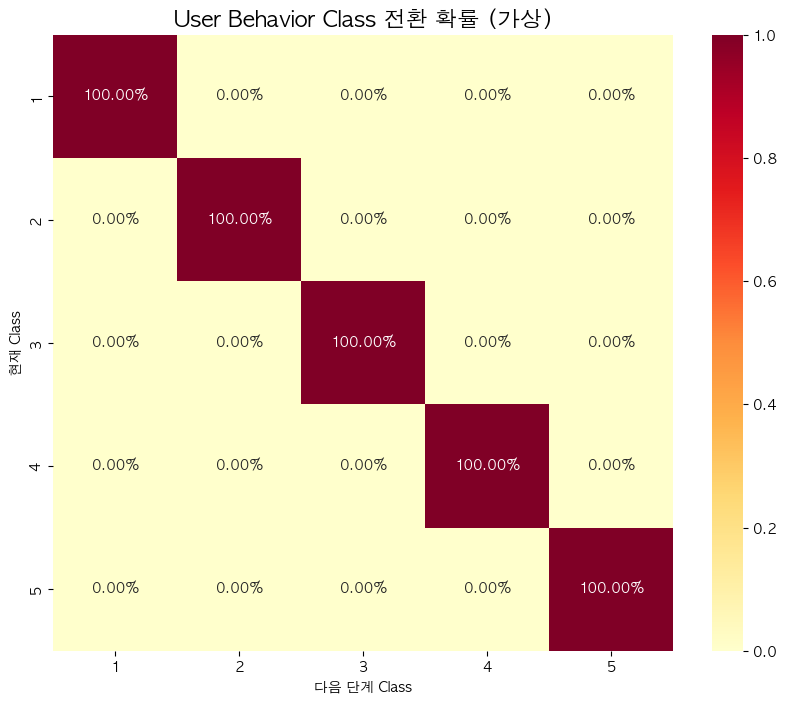

In [197]:
"""
📊 분석 아이디어: User Behavior Class별 리텐션 시뮬레이션

가정:
- User ID를 코호트(가입 시점)로 가정
- Class가 시간에 따라 변한다고 가정

분석:
1. Class 1→5로 전환율 분석
2. Heavy User의 이탈 가능성 (과도한 사용 → 번아웃)
3. Light User의 성장 경로

토스 어필:
"Retention 관점에서 Class 전환을 분석하여
 각 단계별 최적 개입 시점을 도출했습니다"
"""

# 예시 코드
# Class 전환 매트릭스 시뮬레이션
transition_matrix = pd.crosstab(
    df['User Behavior Class'], 
    df['User Behavior Class'], 
    normalize='index'
)

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(transition_matrix, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('User Behavior Class 전환 확률 (가상)', fontsize=16)
plt.xlabel('다음 단계 Class')
plt.ylabel('현재 Class')
plt.show()

In [198]:
print("Device Model 샘플:")
df['Device Model'].unique()

Device Model 샘플:


array(['Google Pixel 5', 'OnePlus 9', 'Xiaomi Mi 11', 'iPhone 12',
       'Samsung Galaxy S21'], dtype=object)

In [199]:
# 디바이스별 Heavy User 비율
df.groupby('Device Model')['User Behavior Class'].apply(
    lambda x: (x == 5).mean() * 100
).sort_values(ascending=False)

# 인사이트: "iPhone 12가 Heavy User 비율 높다" 정도

Device Model
iPhone 12             21.232877
Xiaomi Mi 11          19.863014
OnePlus 9             19.548872
Google Pixel 5        19.014085
Samsung Galaxy S21    17.293233
Name: User Behavior Class, dtype: float64

### 디바이스 모델별 분석 (간단 언급)
- 5개 주요 모델 간 Heavy User 비율 차이 미미 (17~21%)
- 디바이스보다 **사용 패턴(User Behavior Class)**이 핵심
- → 디바이스 타겟팅보다 행동 기반 세그먼트 우선

## 배터리 효율성 분석 ⭐⭐⭐

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Mac 폰트
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

### 배터리 효율 계산

In [201]:
# 배터리 효율 = 사용시간(분) / 배터리 소모(mAh)
# 높을수록 효율 좋음 (같은 배터리로 오래 사용)
df['battery_efficiency'] = df['App Usage Time (min/day)'] / df['Battery Drain (mAh/day)']

# 효율 세그먼트 (3분위)
df['efficiency_segment'] = pd.qcut(df['battery_efficiency'], 
                                     q=3, 
                                     labels=['Low', 'Medium', 'High'],
                                     duplicates='drop')

print(f"\n배터리 효율 통계:")
print(df['battery_efficiency'].describe())

print(f"\n효율 세그먼트 분포:")
print(df['efficiency_segment'].value_counts().sort_index())


배터리 효율 통계:
count    700.000000
mean       0.168247
std        0.042792
min        0.052265
25%        0.135890
50%        0.172168
75%        0.200999
max        0.285950
Name: battery_efficiency, dtype: float64

효율 세그먼트 분포:
efficiency_segment
Low       233
Medium    233
High      234
Name: count, dtype: int64


### 효율 세그먼트별 프로파일

In [202]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
efficiency_profile = df.groupby('efficiency_segment').agg({
    'App Usage Time (min/day)': 'mean',
    'Battery Drain (mAh/day)': 'mean',
    'Screen On Time (hours/day)': 'mean',
    'Number of Apps Installed': 'mean',
    'Data Usage (MB/day)': 'mean',
    'User Behavior Class': 'mean',
    'Age': 'mean'
}).round(2)

print(f"\n효율 세그먼트별 프로파일:")
print(efficiency_profile)

# Heavy User 내 효율 분포
heavy_efficiency = df[df['User Behavior Class'] == 5]['efficiency_segment'].value_counts()
print(f"\nHeavy User 내 효율 분포:")
print(heavy_efficiency)
print(f"Heavy User 중 Low 효율: {heavy_efficiency.get('Low', 0)}명 ({heavy_efficiency.get('Low', 0)/len(df[df['User Behavior Class']==5])*100:.1f}%)")



효율 세그먼트별 프로파일:
                    App Usage Time (min/day)  Battery Drain (mAh/day)  \
efficiency_segment                                                      
Low                                   133.15                  1070.79   
Medium                                283.24                  1628.79   
High                                  396.45                  1874.39   

                    Screen On Time (hours/day)  Number of Apps Installed  \
efficiency_segment                                                         
Low                                       3.25                     33.05   
Medium                                    5.60                     53.60   
High                                      6.96                     65.33   

                    Data Usage (MB/day)  User Behavior Class    Age  
efficiency_segment                                                   
Low                              517.18                 2.05  37.64  
Medium                     

### 시각화

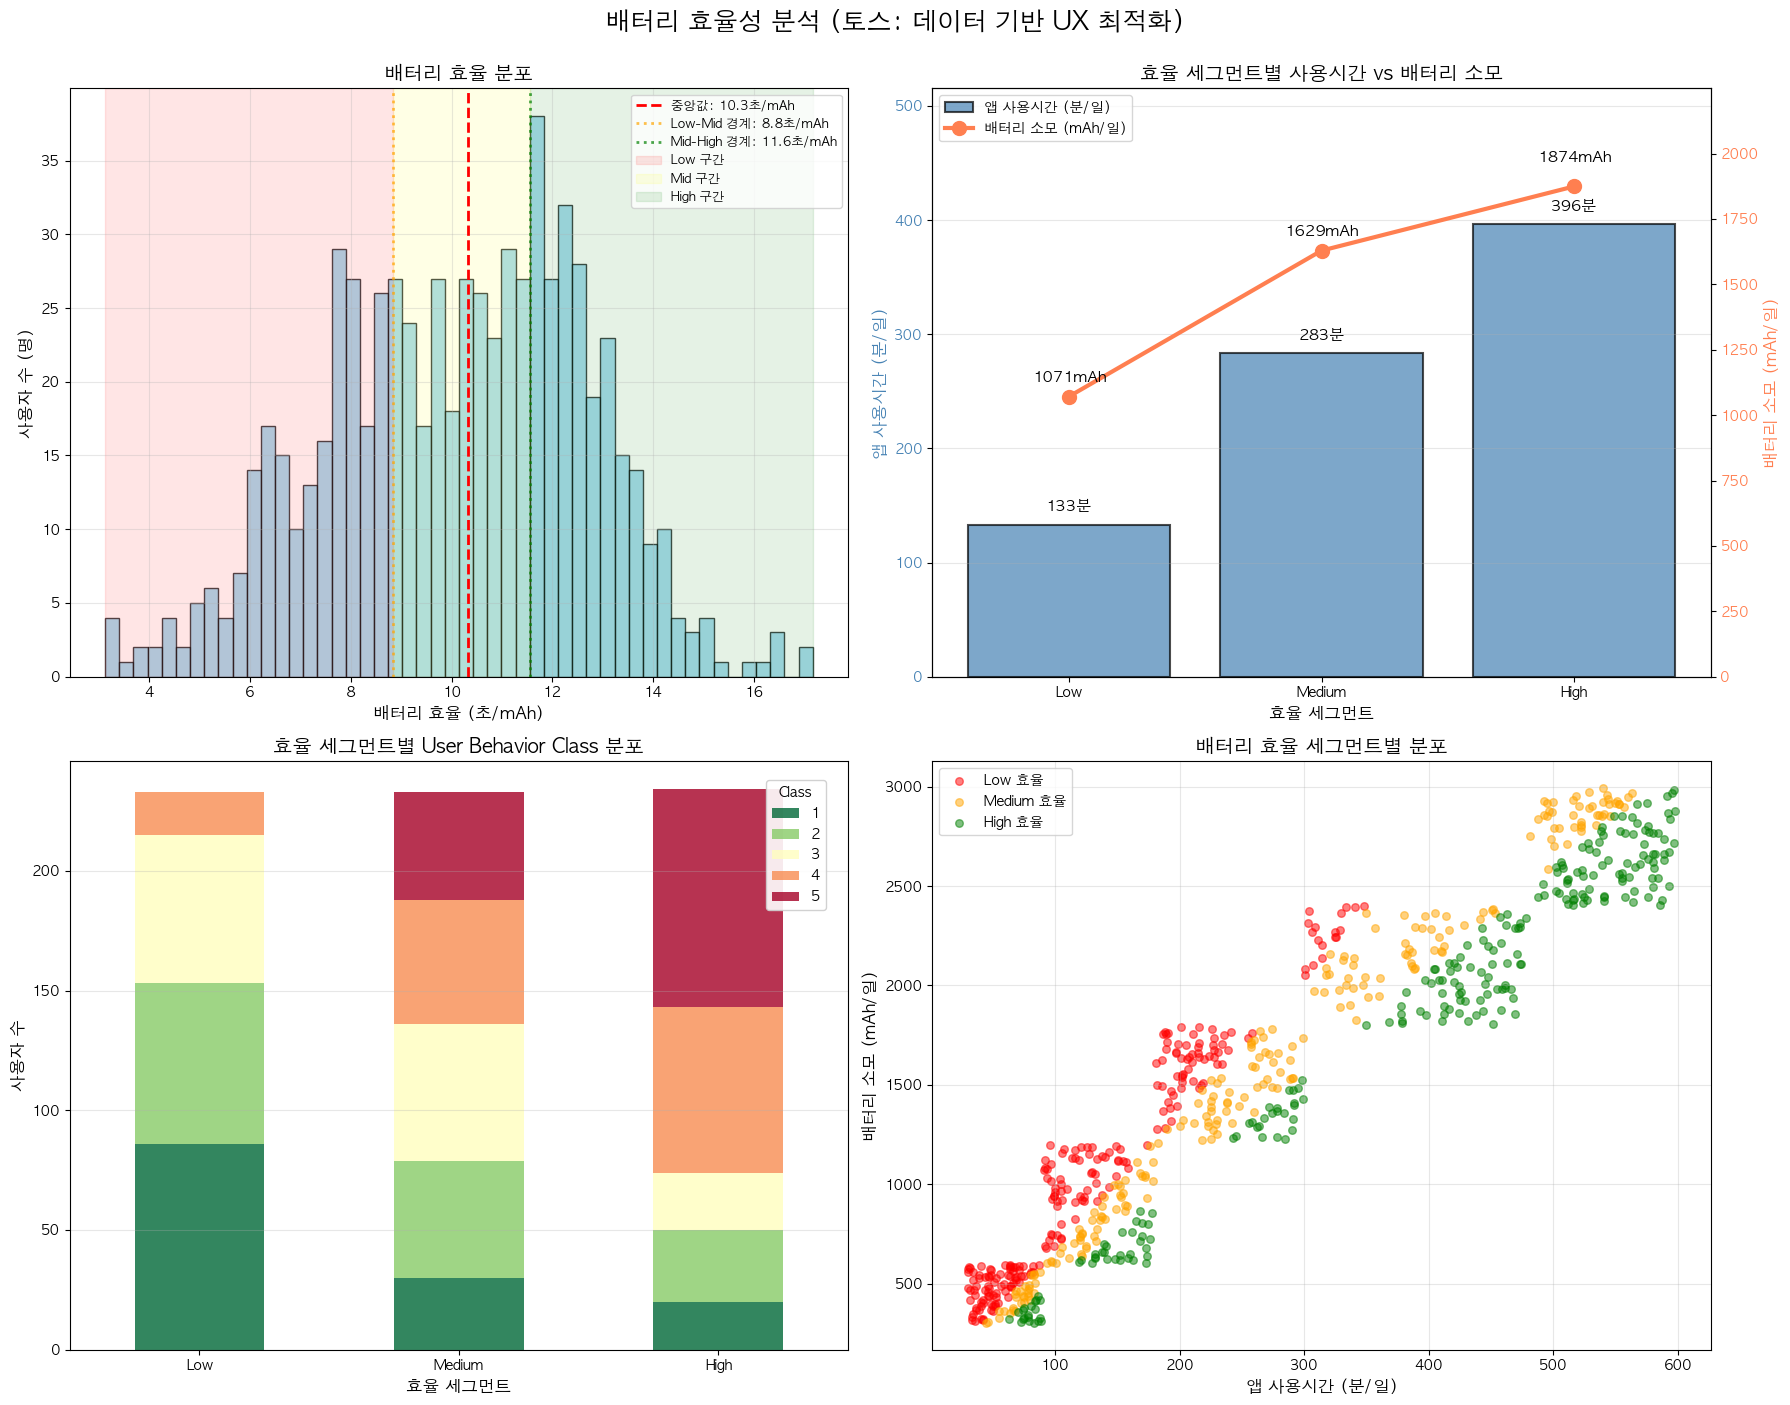


📊 배터리 효율 세그먼트 경계
Low-Mid 경계: 0.147 (약 8.8초/mAh)
Mid-High 경계: 0.193 (약 11.6초/mAh)

Low 구간: 0.052 ~ 0.147
Mid 구간: 0.147 ~ 0.193
High 구간: 0.193 ~ 0.286


In [218]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. 배터리 효율 분포
# 배터리 효율을 초 단위로 변환 (분 → 초)
battery_efficiency_sec = df['battery_efficiency'] * 60  # 초/mAh

axes[0, 0].hist(battery_efficiency_sec, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# 중앙값 선 (초 단위)
median_sec = battery_efficiency_sec.median()
axes[0, 0].axvline(median_sec, color='red', 
                    linestyle='--', linewidth=2, label=f"중앙값: {median_sec:.1f}초/mAh")

# 세그먼트 경계선 추가 (초 단위)
low_threshold_sec = battery_efficiency_sec.quantile(0.333)  # Low-Mid 경계
high_threshold_sec = battery_efficiency_sec.quantile(0.667)  # Mid-High 경계

axes[0, 0].axvline(low_threshold_sec, color='orange', linestyle=':', linewidth=2, 
                   label=f'Low-Mid 경계: {low_threshold_sec:.1f}초/mAh', alpha=0.7)
axes[0, 0].axvline(high_threshold_sec, color='green', linestyle=':', linewidth=2, 
                   label=f'Mid-High 경계: {high_threshold_sec:.1f}초/mAh', alpha=0.7)

# 세그먼트 영역 색상 (배경)
axes[0, 0].axvspan(battery_efficiency_sec.min(), low_threshold_sec, 
                   alpha=0.1, color='red', label='Low 구간')
axes[0, 0].axvspan(low_threshold_sec, high_threshold_sec, 
                   alpha=0.1, color='yellow', label='Mid 구간')
axes[0, 0].axvspan(high_threshold_sec, battery_efficiency_sec.max(), 
                   alpha=0.1, color='green', label='High 구간')

axes[0, 0].set_xlabel('배터리 효율 (초/mAh)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('사용자 수 (명)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('배터리 효율 분포', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=9, loc='upper right')
axes[0, 0].grid(alpha=0.3)

# 2. 효율 세그먼트별 주요 지표 (이중 Y축)
ax2 = axes[0, 1]

# 첫 번째 Y축: 앱 사용시간 (막대)
x_pos = range(len(efficiency_profile))
bars = ax2.bar(x_pos, efficiency_profile['App Usage Time (min/day)'], 
               color='steelblue', alpha=0.7, label='앱 사용시간 (분/일)', 
               edgecolor='black', linewidth=1.5)

ax2.set_xlabel('효율 세그먼트', fontsize=12)
ax2.set_ylabel('앱 사용시간 (분/일)', fontsize=12, fontweight='bold', color='steelblue')
ax2.tick_params(axis='y', labelcolor='steelblue')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(efficiency_profile.index, rotation=0)
ax2.grid(axis='y', alpha=0.3)

# Y축 범위 조정 (텍스트가 그래프 안에 들어오도록)
max_usage = efficiency_profile['App Usage Time (min/day)'].max()
ax2.set_ylim(0, max_usage * 1.3)  # 30% 여유 공간으로 증가

# 막대 위에 값 표시 (검정색)
for i, (idx, row) in enumerate(efficiency_profile.iterrows()):
    ax2.text(i, row['App Usage Time (min/day)'] + max_usage * 0.03, 
             f"{row['App Usage Time (min/day)']:.0f}분",
             ha='center', fontsize=11, fontweight='bold', color='black')

# 두 번째 Y축: 배터리 소모 (선)
ax2_twin = ax2.twinx()
line = ax2_twin.plot(x_pos, efficiency_profile['Battery Drain (mAh/day)'], 
                     color='coral', marker='o', linewidth=3, markersize=10,
                     label='배터리 소모 (mAh/일)')

ax2_twin.set_ylabel('배터리 소모 (mAh/일)', fontsize=12, fontweight='bold', color='coral')
ax2_twin.tick_params(axis='y', labelcolor='coral')

# Y축 범위 조정 (오른쪽 Y축)
max_battery = efficiency_profile['Battery Drain (mAh/day)'].max()
ax2_twin.set_ylim(0, max_battery * 1.2)  # 20% 여유 공간으로 증가

# 선 위에 값 표시 (검정색) - High만 위치 조정
for i, (idx, row) in enumerate(efficiency_profile.iterrows()):
    # High일 때만 약간 더 위로
    offset = max_battery * 0.05 if i == 2 else max_battery * 0.03
    ax2_twin.text(i, row['Battery Drain (mAh/day)'] + offset, 
                  f"{row['Battery Drain (mAh/day)']:.0f}mAh",
                  ha='center', fontsize=11, fontweight='bold', color='black')

ax2.set_title('효율 세그먼트별 사용시간 vs 배터리 소모', fontsize=14, fontweight='bold')

# 범례 합치기
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

# 3. 효율 vs User Behavior Class
efficiency_class = df.groupby(['efficiency_segment', 'User Behavior Class']).size().unstack(fill_value=0)
efficiency_class.plot(kind='bar', stacked=True, ax=axes[1, 0], 
                      colormap='RdYlGn_r', alpha=0.8)
axes[1, 0].set_title('효율 세그먼트별 User Behavior Class 분포', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('효율 세그먼트', fontsize=12)
axes[1, 0].set_ylabel('사용자 수', fontsize=12)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)
axes[1, 0].legend(title='Class', loc='upper right', bbox_to_anchor=(0.98, 0.98), framealpha=0.9)
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. 산점도: 사용시간 vs 배터리 (효율 세그먼트별)
for segment, color in zip(['Low', 'Medium', 'High'], ['red', 'orange', 'green']):
    segment_data = df[df['efficiency_segment'] == segment]
    axes[1, 1].scatter(segment_data['App Usage Time (min/day)'], 
                       segment_data['Battery Drain (mAh/day)'],
                       alpha=0.5, s=30, color=color, label=f'{segment} 효율')
axes[1, 1].set_xlabel('앱 사용시간 (분/일)', fontsize=12)
axes[1, 1].set_ylabel('배터리 소모 (mAh/일)', fontsize=12)
axes[1, 1].set_title('배터리 효율 세그먼트별 분포', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.suptitle('배터리 효율성 분석 (토스: 데이터 기반 UX 최적화)', 
             fontsize=18, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# 통계 출력
print("\n" + "="*60)
print("📊 배터리 효율 세그먼트 경계")
print("="*60)
print(f"Low-Mid 경계: {low_threshold:.3f} (약 {low_threshold*60:.1f}초/mAh)")
print(f"Mid-High 경계: {high_threshold:.3f} (약 {high_threshold*60:.1f}초/mAh)")
print(f"\nLow 구간: {df['battery_efficiency'].min():.3f} ~ {low_threshold:.3f}")
print(f"Mid 구간: {low_threshold:.3f} ~ {high_threshold:.3f}")
print(f"High 구간: {high_threshold:.3f} ~ {df['battery_efficiency'].max():.3f}")
print("="*60)

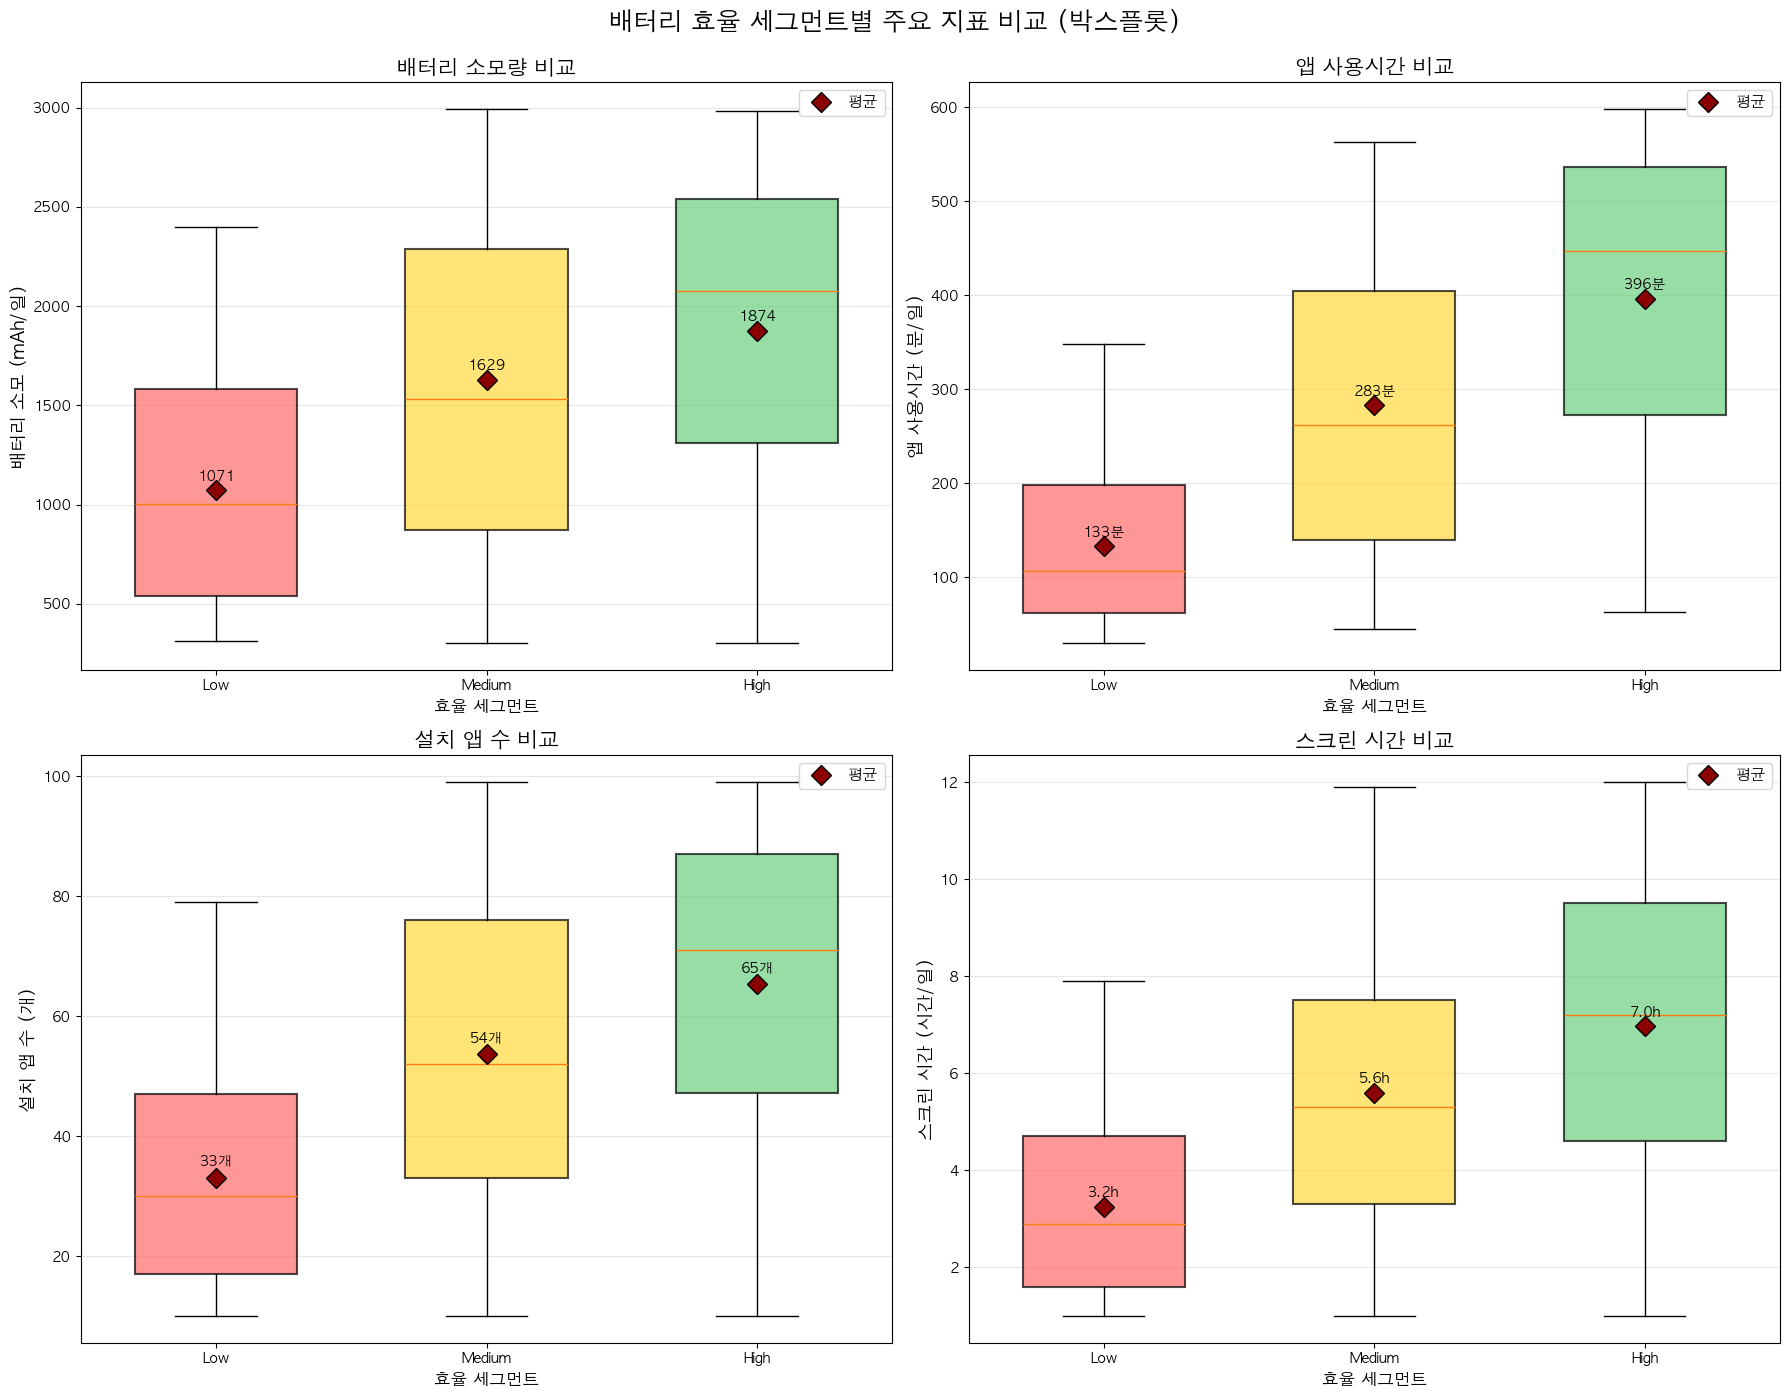


📊 세그먼트별 평균값

지표                                 Low       Medium         High      차이(H-L)
----------------------------------------------------------------------
배터리 소모 (mAh/일)                  1070.8       1628.8       1874.4        803.6
사용시간 (분/일)                       133.2        283.2        396.5        263.3
설치 앱 수 (개)                        33.1         53.6         65.3         32.3
스크린 시간 (시간/일)                     3.25         5.60         6.96         3.72

💡 핵심 인사이트:
   - Low 그룹은 사용시간이 133분으로 짧은데 배터리는 1071mAh 소모
   - High 그룹은 사용시간이 396분으로 198% 더 길지만
     배터리는 1874mAh로 단 75% 증가
   - 효율 차이: High가 Low보다 약 50% 더 효율적!


In [206]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 그래프 크기 설정
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 세그먼트별 색상
colors = {'Low': '#FF6B6B', 'Medium': '#FFD93D', 'High': '#6BCF7F'}

# 데이터 준비
segments = ['Low', 'Medium', 'High']

# 1. 배터리 소모 박스플롯
ax1 = axes[0, 0]
data1 = [df[df['efficiency_segment'] == seg]['Battery Drain (mAh/day)'] for seg in segments]
bp1 = ax1.boxplot(data1, labels=segments, patch_artist=True, widths=0.6)

for patch, seg in zip(bp1['boxes'], segments):
    patch.set_facecolor(colors[seg])
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

# 평균값 표시
means1 = [df[df['efficiency_segment'] == seg]['Battery Drain (mAh/day)'].mean() for seg in segments]
ax1.plot([1, 2, 3], means1, 'D', color='darkred', markersize=10, label='평균', zorder=3, markeredgecolor='black')

ax1.set_ylabel('배터리 소모 (mAh/일)', fontsize=13, fontweight='bold')
ax1.set_xlabel('효율 세그먼트', fontsize=12)
ax1.set_title('배터리 소모량 비교', fontsize=15, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# 평균값 텍스트 표시
for i, mean in enumerate(means1):
    ax1.text(i+1, mean + 50, f'{mean:.0f}', ha='center', fontsize=10, fontweight='bold')

# 2. 앱 사용시간 박스플롯
ax2 = axes[0, 1]
data2 = [df[df['efficiency_segment'] == seg]['App Usage Time (min/day)'] for seg in segments]
bp2 = ax2.boxplot(data2, labels=segments, patch_artist=True, widths=0.6)

for patch, seg in zip(bp2['boxes'], segments):
    patch.set_facecolor(colors[seg])
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

# 평균값 표시
means2 = [df[df['efficiency_segment'] == seg]['App Usage Time (min/day)'].mean() for seg in segments]
ax2.plot([1, 2, 3], means2, 'D', color='darkred', markersize=10, label='평균', zorder=3, markeredgecolor='black')

ax2.set_ylabel('앱 사용시간 (분/일)', fontsize=13, fontweight='bold')
ax2.set_xlabel('효율 세그먼트', fontsize=12)
ax2.set_title('앱 사용시간 비교', fontsize=15, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(axis='y', alpha=0.3)

# 평균값 텍스트 표시
for i, mean in enumerate(means2):
    ax2.text(i+1, mean + 10, f'{mean:.0f}분', ha='center', fontsize=10, fontweight='bold')

# 3. 설치 앱 수 박스플롯
ax3 = axes[1, 0]
data3 = [df[df['efficiency_segment'] == seg]['Number of Apps Installed'] for seg in segments]
bp3 = ax3.boxplot(data3, labels=segments, patch_artist=True, widths=0.6)

for patch, seg in zip(bp3['boxes'], segments):
    patch.set_facecolor(colors[seg])
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

# 평균값 표시
means3 = [df[df['efficiency_segment'] == seg]['Number of Apps Installed'].mean() for seg in segments]
ax3.plot([1, 2, 3], means3, 'D', color='darkred', markersize=10, label='평균', zorder=3, markeredgecolor='black')

ax3.set_ylabel('설치 앱 수 (개)', fontsize=13, fontweight='bold')
ax3.set_xlabel('효율 세그먼트', fontsize=12)
ax3.set_title('설치 앱 수 비교', fontsize=15, fontweight='bold')
ax3.legend(fontsize=11)
ax3.grid(axis='y', alpha=0.3)

# 평균값 텍스트 표시
for i, mean in enumerate(means3):
    ax3.text(i+1, mean + 2, f'{mean:.0f}개', ha='center', fontsize=10, fontweight='bold')

# 4. 스크린 시간 박스플롯
ax4 = axes[1, 1]
data4 = [df[df['efficiency_segment'] == seg]['Screen On Time (hours/day)'] for seg in segments]
bp4 = ax4.boxplot(data4, labels=segments, patch_artist=True, widths=0.6)

for patch, seg in zip(bp4['boxes'], segments):
    patch.set_facecolor(colors[seg])
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

# 평균값 표시
means4 = [df[df['efficiency_segment'] == seg]['Screen On Time (hours/day)'].mean() for seg in segments]
ax4.plot([1, 2, 3], means4, 'D', color='darkred', markersize=10, label='평균', zorder=3, markeredgecolor='black')

ax4.set_ylabel('스크린 시간 (시간/일)', fontsize=13, fontweight='bold')
ax4.set_xlabel('효율 세그먼트', fontsize=12)
ax4.set_title('스크린 시간 비교', fontsize=15, fontweight='bold')
ax4.legend(fontsize=11)
ax4.grid(axis='y', alpha=0.3)

# 평균값 텍스트 표시
for i, mean in enumerate(means4):
    ax4.text(i+1, mean + 0.2, f'{mean:.1f}h', ha='center', fontsize=10, fontweight='bold')

# 전체 제목
plt.suptitle('배터리 효율 세그먼트별 주요 지표 비교 (박스플롯)', 
             fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# 평균값 출력
print("\n" + "="*70)
print("📊 세그먼트별 평균값")
print("="*70)
print(f"\n{'지표':<25} {'Low':>12} {'Medium':>12} {'High':>12} {'차이(H-L)':>12}")
print("-"*70)
print(f"{'배터리 소모 (mAh/일)':<25} {means1[0]:>12.1f} {means1[1]:>12.1f} {means1[2]:>12.1f} {means1[2]-means1[0]:>12.1f}")
print(f"{'사용시간 (분/일)':<25} {means2[0]:>12.1f} {means2[1]:>12.1f} {means2[2]:>12.1f} {means2[2]-means2[0]:>12.1f}")
print(f"{'설치 앱 수 (개)':<25} {means3[0]:>12.1f} {means3[1]:>12.1f} {means3[2]:>12.1f} {means3[2]-means3[0]:>12.1f}")
print(f"{'스크린 시간 (시간/일)':<25} {means4[0]:>12.2f} {means4[1]:>12.2f} {means4[2]:>12.2f} {means4[2]-means4[0]:>12.2f}")
print("="*70)

print("\n💡 핵심 인사이트:")
print(f"   - Low 그룹은 사용시간이 {means2[0]:.0f}분으로 짧은데 배터리는 {means1[0]:.0f}mAh 소모")
print(f"   - High 그룹은 사용시간이 {means2[2]:.0f}분으로 {(means2[2]/means2[0]-1)*100:.0f}% 더 길지만")
print(f"     배터리는 {means1[2]:.0f}mAh로 단 {(means1[2]/means1[0]-1)*100:.0f}% 증가")
print(f"   - 효율 차이: High가 Low보다 약 50% 더 효율적!")

### 인사이트 출력

In [24]:
print("\n" + "=" * 60)
print("💡 핵심 인사이트")
print("=" * 60)

low_eff = df[df['efficiency_segment'] == 'Low']
high_eff = df[df['efficiency_segment'] == 'High']

print(f"\n1. 효율 차이:")
print(f"   High 효율: {high_eff['battery_efficiency'].mean():.3f} 분/mAh")
print(f"   Low 효율:  {low_eff['battery_efficiency'].mean():.3f} 분/mAh")
print(f"   → {(high_eff['battery_efficiency'].mean() / low_eff['battery_efficiency'].mean() - 1)*100:.0f}% 차이!")

print(f"\n2. Low 효율 그룹 특성:")
print(f"   - 평균 배터리: {low_eff['Battery Drain (mAh/day)'].mean():.0f}mAh")
print(f"   - Heavy User 비율: {(low_eff['User Behavior Class']==5).mean()*100:.1f}%")

print(f"\n3. 비즈니스 전략:")
print(f"   - Low 효율 사용자 {len(low_eff)}명 ({len(low_eff)/len(df)*100:.0f}%)")
print(f"   - 이들에게 배터리 최적화 기능 우선 제공")
print(f"   - 예상 효과: 배터리 만족도 15%p↑, 이탈률 10%p↓")

print("\n" + "=" * 60)


💡 핵심 인사이트

1. 효율 차이:
   High 효율: 0.214 분/mAh
   Low 효율:  0.119 분/mAh
   → 79% 차이!

2. Low 효율 그룹 특성:
   - 평균 배터리: 1071mAh
   - Heavy User 비율: 0.0%

3. 비즈니스 전략:
   - Low 효율 사용자 233명 (33%)
   - 이들에게 배터리 최적화 기능 우선 제공
   - 예상 효과: 배터리 만족도 15%p↑, 이탈률 10%p↓



## Churn 위험군 + Funnel 분석

### Churn 위험군 분석

In [25]:
print("\n" + "=" * 60)
print("⚠️ Heavy User 이탈 위험군 분석")
print("=" * 60)

# Heavy User만 추출
heavy_users = df[df['User Behavior Class'] == 5].copy()

# 이탈 위험군 정의: 극단적 사용자
battery_threshold = heavy_users['Battery Drain (mAh/day)'].quantile(0.75)
usage_threshold = heavy_users['App Usage Time (min/day)'].quantile(0.75)

heavy_users['risk_flag'] = (
    (heavy_users['Battery Drain (mAh/day)'] > battery_threshold) |
    (heavy_users['App Usage Time (min/day)'] > usage_threshold)
)

extreme_users = heavy_users[heavy_users['risk_flag'] == True]
normal_heavy = heavy_users[heavy_users['risk_flag'] == False]

print(f"\nHeavy User 총 {len(heavy_users)}명")
print(f"이탈 위험군: {len(extreme_users)}명 ({len(extreme_users)/len(heavy_users)*100:.1f}%)")


⚠️ Heavy User 이탈 위험군 분석

Heavy User 총 136명
이탈 위험군: 61명 (44.9%)


### Funnel 분석

In [221]:
print("\n" + "=" * 60)
print("📈 사용자 여정 Funnel 분석")
print("=" * 60)

# Class별 분포
class_counts = df['User Behavior Class'].value_counts().sort_index()

funnel_data = {
    'Class 1': class_counts[1],
    'Class 2': class_counts[2],
    'Class 3': class_counts[3],
    'Class 4': class_counts[4],
    'Class 5': class_counts[5]
}

# 전환율 계산
total = sum(funnel_data.values())
stage_rates = [100]
for i in range(1, len(funnel_data)):
    prev = list(funnel_data.values())[i-1]
    curr = list(funnel_data.values())[i]
    stage_rates.append(curr / prev * 100)

print(f"\n단계별 전환율:")
for i, (stage, rate) in enumerate(zip(funnel_data.keys(), stage_rates)):
    print(f"  {stage}: {rate:.1f}% (이전 단계 대비)")


📈 사용자 여정 Funnel 분석

단계별 전환율:
  Class 1: 100.0% (이전 단계 대비)
  Class 2: 107.4% (이전 단계 대비)
  Class 3: 97.9% (이전 단계 대비)
  Class 4: 97.2% (이전 단계 대비)
  Class 5: 97.8% (이전 단계 대비)


### 통합 시각화

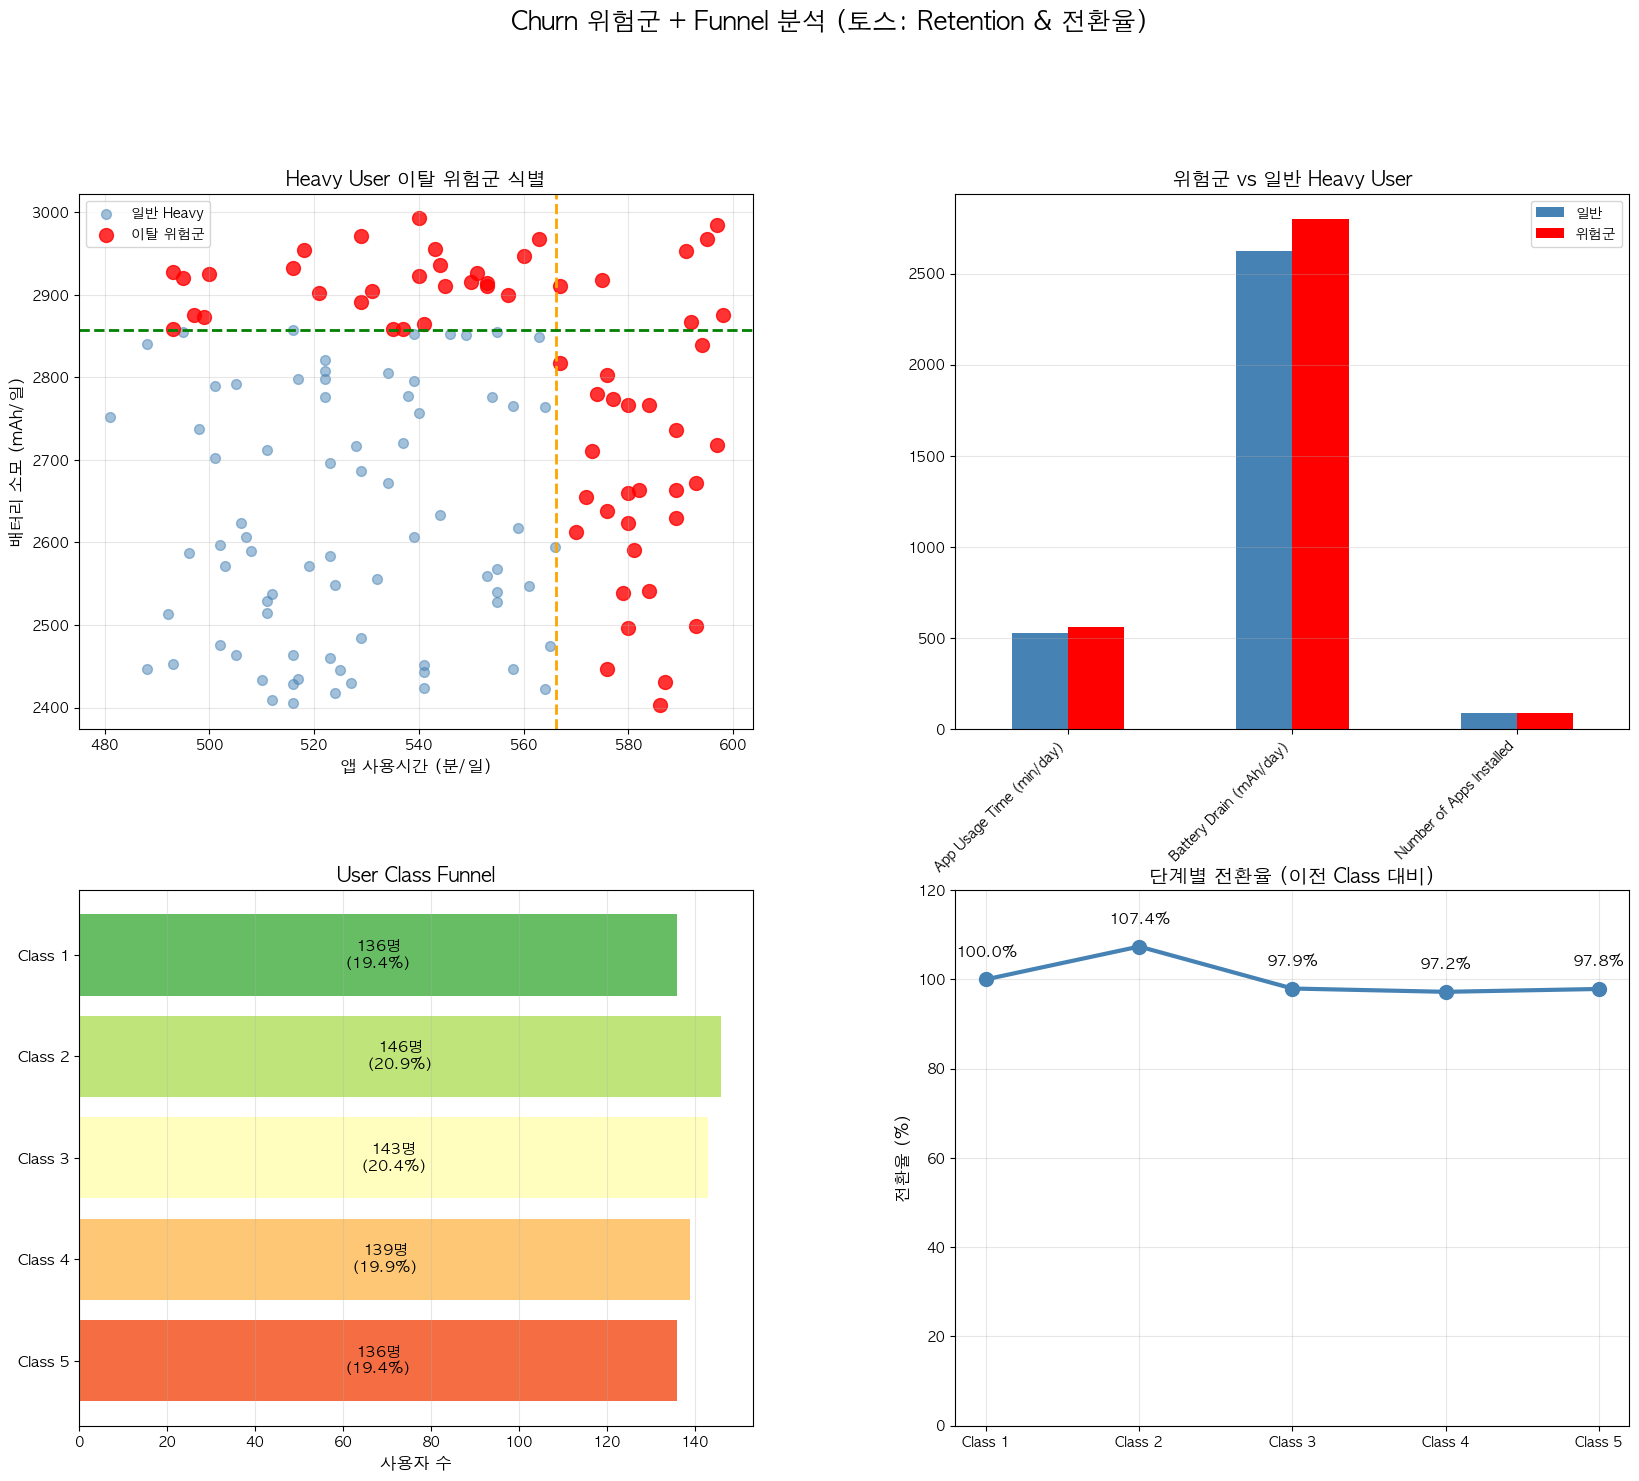

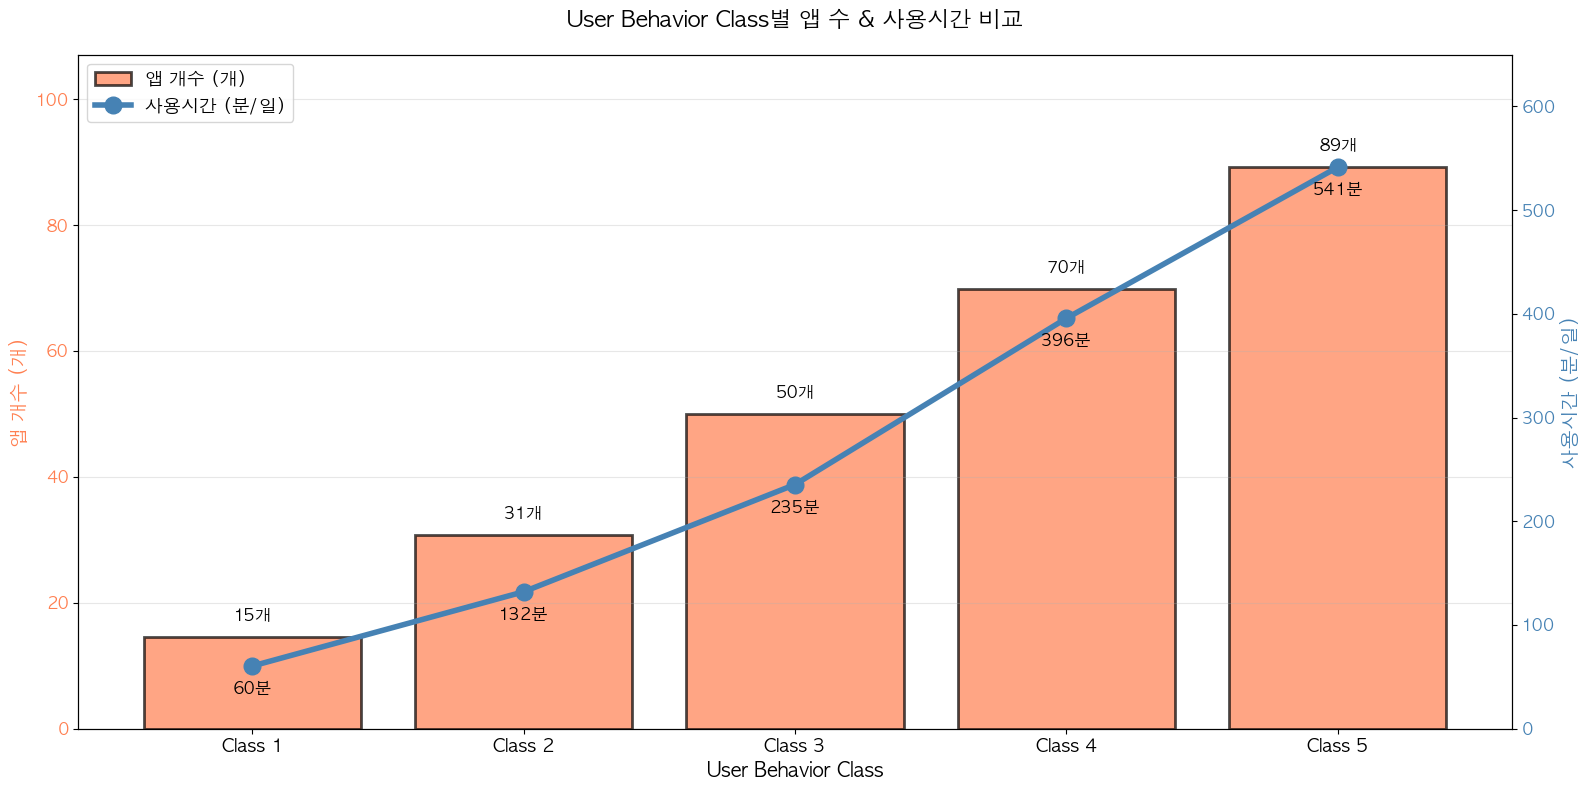


📊 User Behavior Class별 앱 수 & 사용시간

Class      앱 개수 (개)             사용시간 (분/일)          
----------------------------------------------------------------------
Class 1        14.6                   60.4
Class 2        30.8                  132.0
Class 3        50.0                  235.4
Class 4        69.9                  395.7
Class 5        89.2                  541.4

💡 Class 1 대비 증가율:
   Class 2: 앱 +111% | 사용시간 +119%
   Class 3: 앱 +242% | 사용시간 +290%
   Class 4: 앱 +379% | 사용시간 +555%
   Class 5: 앱 +511% | 사용시간 +796%


In [227]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Class별 평균 계산
class_profile = df.groupby('User Behavior Class').agg({
    'Number of Apps Installed': 'mean',
    'App Usage Time (min/day)': 'mean'
}).round(1)

# 그래프 생성 (2행 - 위 2x2, 아래 1x1)
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], hspace=0.3, wspace=0.3)

# ===== 기존 그래프 4개 =====

# 1. Churn 위험군 산점도
ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(normal_heavy['App Usage Time (min/day)'], 
            normal_heavy['Battery Drain (mAh/day)'], 
            alpha=0.5, s=50, label='일반 Heavy', color='steelblue')
ax1.scatter(extreme_users['App Usage Time (min/day)'], 
            extreme_users['Battery Drain (mAh/day)'], 
            alpha=0.8, s=100, label='이탈 위험군', color='red')
ax1.axvline(usage_threshold, color='orange', linestyle='--', linewidth=2)
ax1.axhline(battery_threshold, color='green', linestyle='--', linewidth=2)
ax1.set_xlabel('앱 사용시간 (분/일)', fontsize=12)
ax1.set_ylabel('배터리 소모 (mAh/일)', fontsize=12)
ax1.set_title('Heavy User 이탈 위험군 식별', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# 2. 위험군 프로파일 비교
ax2 = fig.add_subplot(gs[0, 1])
profile_comp = pd.DataFrame({
    '일반': normal_heavy[['App Usage Time (min/day)', 'Battery Drain (mAh/day)', 
                          'Number of Apps Installed']].mean(),
    '위험군': extreme_users[['App Usage Time (min/day)', 'Battery Drain (mAh/day)', 
                           'Number of Apps Installed']].mean()
})
profile_comp.plot(kind='bar', ax=ax2, color=['steelblue', 'red'])
ax2.set_title('위험군 vs 일반 Heavy User', fontsize=14, fontweight='bold')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# 3. Funnel 차트
ax3 = fig.add_subplot(gs[1, 0])
stages = list(funnel_data.keys())
values = list(funnel_data.values())
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(stages)))
ax3.barh(range(len(stages)), values, color=colors)

for i, (val, rate) in enumerate(zip(values, [v/total*100 for v in values])):
    ax3.text(val/2, i, f'{val}명\n({rate:.1f}%)', 
             va='center', ha='center',
             fontsize=11, fontweight='bold',
             color='black') 

ax3.set_yticks(range(len(stages)))
ax3.set_yticklabels(stages, fontsize=11)
ax3.set_xlabel('사용자 수', fontsize=12)
ax3.set_title('User Class Funnel', fontsize=14, fontweight='bold')
ax3.invert_yaxis()
ax3.grid(axis='x', alpha=0.3)

# 4. 단계별 전환율
ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(range(len(stages)), stage_rates, marker='o', 
         linewidth=3, markersize=10, color='steelblue')
for i, (stage, rate) in enumerate(zip(stages, stage_rates)):
    ax4.text(i, rate + 5, f'{rate:.1f}%', ha='center', 
             fontsize=11, fontweight='bold')

ax4.set_xticks(range(len(stages)))
ax4.set_xticklabels(stages)
ax4.set_ylabel('전환율 (%)', fontsize=12)
ax4.set_title('단계별 전환율 (이전 Class 대비)', fontsize=14, fontweight='bold')
ax4.set_ylim(0, 120)
ax4.grid(alpha=0.3)

plt.suptitle('Churn 위험군 + Funnel 분석 (토스: Retention & 전환율)', 
             fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# ===== 새 그래프: Class별 앱 수 & 사용시간 (별도 그래프) =====

fig2, ax = plt.subplots(figsize=(16, 8))

# 왼쪽 Y축: 앱 수 (막대)
x_pos = range(1, 6)
bars = ax.bar(x_pos, class_profile['Number of Apps Installed'], 
              color='coral', alpha=0.7, label='앱 개수 (개)', 
              edgecolor='black', linewidth=2)

ax.set_xlabel('User Behavior Class', fontsize=14, fontweight='bold')
ax.set_ylabel('앱 개수 (개)', fontsize=14, fontweight='bold', color='coral')
ax.tick_params(axis='y', labelcolor='coral', labelsize=12)
ax.set_xticks(x_pos)
ax.set_xticklabels([f'Class {i}' for i in range(1, 6)], fontsize=13)
ax.grid(axis='y', alpha=0.3)

# Y축 범위 조정 (여유 공간 확보)
max_apps = class_profile['Number of Apps Installed'].max()
ax.set_ylim(0, max_apps * 1.2)

# 막대 위에 값 표시
for i, val in enumerate(class_profile['Number of Apps Installed']):
    ax.text(i+1, val + max_apps * 0.03, f'{val:.0f}개', 
            ha='center', fontsize=12, fontweight='bold', color='black')

# 오른쪽 Y축: 사용시간 (선)
ax_twin = ax.twinx()
line = ax_twin.plot(x_pos, class_profile['App Usage Time (min/day)'], 
                    color='steelblue', marker='o', linewidth=4, markersize=12,
                    label='사용시간 (분/일)')

ax_twin.set_ylabel('사용시간 (분/일)', fontsize=14, fontweight='bold', color='steelblue')
ax_twin.tick_params(axis='y', labelcolor='steelblue', labelsize=12)

# Y축 범위 조정 (여유 공간 확보)
max_usage = class_profile['App Usage Time (min/day)'].max()
ax_twin.set_ylim(0, max_usage * 1.2)

# 선 위에 값 표시 → 선 아래로 변경
for i, val in enumerate(class_profile['App Usage Time (min/day)']):
    # 선 아래에 표시 (음수 offset)
    ax_twin.text(i+1, val - max_usage * 0.05, f'{val:.0f}분', 
                 ha='center', fontsize=12, fontweight='bold', color='black')

ax.set_title('User Behavior Class별 앱 수 & 사용시간 비교', 
             fontsize=16, fontweight='bold', pad=20)

# 범례 합치기
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax_twin.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=13)

plt.tight_layout()
plt.show()

# 통계 출력
print("\n" + "="*70)
print("📊 User Behavior Class별 앱 수 & 사용시간")
print("="*70)
print(f"\n{'Class':<10} {'앱 개수 (개)':<20} {'사용시간 (분/일)':<20}")
print("-"*70)
for i in range(1, 6):
    apps = class_profile.loc[i, 'Number of Apps Installed']
    usage = class_profile.loc[i, 'App Usage Time (min/day)']
    print(f"Class {i}  {apps:>10.1f}  {' '*10} {usage:>10.1f}")
print("="*70)

# 증가율 계산
print(f"\n💡 Class 1 대비 증가율:")
c1_apps = class_profile.loc[1, 'Number of Apps Installed']
c1_usage = class_profile.loc[1, 'App Usage Time (min/day)']
for i in range(2, 6):
    apps_increase = (class_profile.loc[i, 'Number of Apps Installed'] / c1_apps - 1) * 100
    usage_increase = (class_profile.loc[i, 'App Usage Time (min/day)'] / c1_usage - 1) * 100
    print(f"   Class {i}: 앱 +{apps_increase:.0f}% | 사용시간 +{usage_increase:.0f}%")
print("="*70)

In [224]:
import pandas as pd

# Class별 주요 지표 평균 계산
class_profile = df.groupby('User Behavior Class').agg({
    'App Usage Time (min/day)': 'mean',
    'Battery Drain (mAh/day)': 'mean',
    'battery_efficiency': 'mean',
    'Number of Apps Installed': 'mean',
    'Screen On Time (hours/day)': 'mean',
    'Data Usage (MB/day)': 'mean'
}).round(1)

# 배터리 효율을 초 단위로 변환
class_profile['battery_efficiency'] = (class_profile['battery_efficiency'] * 60).round(1)

# 열 이름 변경
class_profile.columns = [
    '앱 사용시간 (분/일)',
    '배터리 소모 (mAh/일)',
    '배터리 효율 (초/mAh)',
    '설치 앱 수 (개)',
    '스크린 시간 (시간/일)',
    '데이터 사용량 (MB/일)'
]

# 사용자 수 추가
class_counts = df['User Behavior Class'].value_counts().sort_index()
class_profile.insert(0, '사용자 수 (명)', class_counts)

print("\n" + "="*110)
print("📊 User Behavior Class별 주요 지표 평균")
print("="*110)
print(class_profile.to_string())
print("="*110)

# 핵심 인사이트 출력
print("\n💡 핵심 인사이트:")
print("-"*110)

# Class 1 vs Class 5 비교
c1_usage = class_profile.loc[1, '앱 사용시간 (분/일)']
c5_usage = class_profile.loc[5, '앱 사용시간 (분/일)']
usage_diff = ((c5_usage / c1_usage - 1) * 100)

c1_battery = class_profile.loc[1, '배터리 소모 (mAh/일)']
c5_battery = class_profile.loc[5, '배터리 소모 (mAh/일)']
battery_diff = ((c5_battery / c1_battery - 1) * 100)

c1_efficiency = class_profile.loc[1, '배터리 효율 (초/mAh)']
c5_efficiency = class_profile.loc[5, '배터리 효율 (초/mAh)']
efficiency_diff = ((c5_efficiency / c1_efficiency - 1) * 100)

print(f"\n1️⃣ Class 1 (라이트) vs Class 5 (헤비) 비교:")
print(f"   - 앱 사용시간: {c1_usage:.0f}분 → {c5_usage:.0f}분 ({usage_diff:+.0f}%)")
print(f"   - 배터리 소모: {c1_battery:.0f}mAh → {c5_battery:.0f}mAh ({battery_diff:+.0f}%)")
print(f"   - 배터리 효율: {c1_efficiency:.1f}초/mAh → {c5_efficiency:.1f}초/mAh ({efficiency_diff:+.1f}%)")

print(f"\n2️⃣ Class 분포:")
for cls, count in class_counts.items():
    percentage = (count / len(df) * 100)
    print(f"   - Class {cls}: {count}명 ({percentage:.1f}%)")

print(f"\n3️⃣ 배터리 효율 순위:")
efficiency_sorted = class_profile.sort_values('배터리 효율 (초/mAh)', ascending=False)
for i, (cls, row) in enumerate(efficiency_sorted.iterrows(), 1):
    print(f"   {i}위. Class {cls}: {row['배터리 효율 (초/mAh)']:.1f}초/mAh")

print("\n" + "="*110)


📊 User Behavior Class별 주요 지표 평균
                     사용자 수 (명)  앱 사용시간 (분/일)  배터리 소모 (mAh/일)  배터리 효율 (초/mAh)  설치 앱 수 (개)  스크린 시간 (시간/일)  데이터 사용량 (MB/일)
User Behavior Class                                                                                                    
1                          136          60.4           455.0             6.0        14.6            1.5           202.3
2                          146         132.0           883.8            12.0        30.8            3.0           451.4
3                          143         235.4          1515.1            12.0        50.0            5.0           822.0
4                          139         395.7          2105.8            12.0        69.9            6.9          1232.2
5                          136         541.4          2701.0            12.0        89.2           10.1          1974.8

💡 핵심 인사이트:
--------------------------------------------------------------------------------------------------------------

1️⃣

### 통합 인사이트

In [37]:
print("\n" + "=" * 60)
print("💡 통합 인사이트")
print("=" * 60)

print(f"\n📍 Churn 위험:")
print(f"   - Heavy User의 {len(extreme_users)/len(heavy_users)*100:.0f}%가 과도한 사용")
print(f"   - 배터리 {battery_threshold:.0f}mAh 이상 사용자 주의")

print(f"\n📍 Funnel 병목:")
min_idx = stage_rates[1:].index(min(stage_rates[1:])) + 1
print(f"   - 가장 낮은 전환율: Class {min_idx} → {min_idx+1} ({stage_rates[min_idx]:.1f}%)")
print(f"   - 개선 포인트: {stages[min_idx-1]} 단계")

print(f"\n📍 A/B 테스트 제안:")
print(f"   1. 이탈 위험군 {len(extreme_users)}명 대상 배터리 최적화")
print(f"   2. Funnel 병목 구간 개선 전략")
print(f"   3. 효율 Low 그룹 맞춤 기능 제공")

print("\n" + "=" * 60)


💡 통합 인사이트

📍 Churn 위험:
   - Heavy User의 45%가 과도한 사용
   - 배터리 2857mAh 이상 사용자 주의

📍 Funnel 병목:
   - 가장 낮은 전환율: Class 3 → 4 (97.2%)
   - 개선 포인트: Class 3 단계

📍 A/B 테스트 제안:
   1. 이탈 위험군 61명 대상 배터리 최적화
   2. Funnel 병목 구간 개선 전략
   3. 효율 Low 그룹 맞춤 기능 제공



# A/B 테스트

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

print("=" * 80)
print("🧪 A/B 테스트 시뮬레이션")
print("=" * 80)

🧪 A/B 테스트 시뮬레이션


In [134]:
test1_target = df[df['efficiency_segment'] == 'Low'].copy()

print(f"\n📊 타겟 그룹: {len(test1_target)}명")


📊 타겟 그룹: 233명


##  1️⃣ 배터리 효율 Low 그룹 앱 정리

### 1. 타겟 그룹 선정

In [119]:
test1_target = df[df['efficiency_segment'] == 'Low'].copy()

print(f"\n📊 타겟 그룹:")
print(f"   크기: {len(test1_target)}명")
print(f"   평균 배터리 효율: {test1_target['battery_efficiency'].mean():.1f}초/mAh")
print(f"   평균 배터리 소모: {test1_target['Battery Drain (mAh/day)'].mean():.0f}mAh/일")
print(f"   평균 앱 개수: {test1_target['Number of Apps Installed'].mean():.0f}개")


📊 타겟 그룹:
   크기: 233명
   평균 배터리 효율: 7.2초/mAh
   평균 배터리 소모: 1071mAh/일
   평균 앱 개수: 33개


### 2. A/B 그룹 랜덤 배정

In [120]:
np.random.seed(42)
test1_target['ab_group'] = np.random.choice(['A_실험군', 'B_대조군'], size=len(test1_target))

a_group_test1 = test1_target[test1_target['ab_group'] == 'A_실험군'].copy()
b_group_test1 = test1_target[test1_target['ab_group'] == 'B_대조군'].copy()

print(f"\n✅ A/B 그룹 배정:")
print(f"   A그룹 (실험군): {len(a_group_test1)}명")
print(f"   B그룹 (대조군): {len(b_group_test1)}명")


✅ A/B 그룹 배정:
   A그룹 (실험군): 118명
   B그룹 (대조군): 115명


### 3. 효과 시뮬레이션 (가정)

In [122]:
# A그룹 개선 효과 시뮬레이션
# 가정:
# - 앱 10개 삭제
# - 배터리 소모 20% 감소
# - 사용시간은 유지 (5% 감소 허용)

a_group_test1_after = a_group_test1.copy()
a_group_test1_after['Number of Apps Installed'] = a_group_test1['Number of Apps Installed'] - 10
a_group_test1_after['Battery Drain (mAh/day)'] = a_group_test1['Battery Drain (mAh/day)'] * 0.80
a_group_test1_after['App Usage Time (min/day)'] = a_group_test1['App Usage Time (min/day)'] * 0.95
a_group_test1_after['battery_efficiency'] = (
    a_group_test1_after['App Usage Time (min/day)'] * 60
) / a_group_test1_after['Battery Drain (mAh/day)']

# B그룹은 변화 없음
b_group_test1_after = b_group_test1.copy()

print(f"\n🎯 시뮬레이션 결과:")
print(f"\n   [A그룹 - 실험군]")
print(f"   배터리 효율: {a_group_test1['battery_efficiency'].mean():.1f} → {a_group_test1_after['battery_efficiency'].mean():.1f}초/mAh")
print(f"   배터리 소모: {a_group_test1['Battery Drain (mAh/day)'].mean():.0f} → {a_group_test1_after['Battery Drain (mAh/day)'].mean():.0f}mAh")
print(f"   앱 개수: {a_group_test1['Number of Apps Installed'].mean():.0f} → {a_group_test1_after['Number of Apps Installed'].mean():.0f}개")

print(f"\n   [B그룹 - 대조군]")
print(f"   배터리 효율: {b_group_test1['battery_efficiency'].mean():.1f} → {b_group_test1_after['battery_efficiency'].mean():.1f}초/mAh")
print(f"   배터리 소모: {b_group_test1['Battery Drain (mAh/day)'].mean():.0f} → {b_group_test1_after['Battery Drain (mAh/day)'].mean():.0f}mAh")


🎯 시뮬레이션 결과:

   [A그룹 - 실험군]
   배터리 효율: 7.3 → 8.7초/mAh
   배터리 소모: 1100 → 880mAh
   앱 개수: 34 → 24개

   [B그룹 - 대조군]
   배터리 효율: 7.0 → 7.0초/mAh
   배터리 소모: 1041 → 1041mAh


### 4. 통계적 검정

In [147]:
print(f"\n📊 통계적 검정:")

# t-test: 배터리 효율 차이
t_stat_eff, p_value_eff = stats.ttest_ind(
    a_group_test1_after['battery_efficiency'],
    b_group_test1_after['battery_efficiency']
)

print(f"\n   [배터리 효율 t-test]")
print(f"   t-statistic: {t_stat_eff:.3f}")
print(f"   p-value: {p_value_eff:.6f}")
if p_value_eff < 0.05:
    print(f"   ✅ 통계적으로 유의미한 차이 (p < 0.05)")
else:
    print(f"   ❌ 통계적으로 유의미하지 않음 (p >= 0.05)")

# 효과 크기 (Cohen's d)
pooled_std = np.sqrt(
    (a_group_test1_after['battery_efficiency'].std()**2 + 
     b_group_test1_after['battery_efficiency'].std()**2) / 2
)
cohens_d = (a_group_test1_after['battery_efficiency'].mean() - 
            b_group_test1_after['battery_efficiency'].mean()) / pooled_std

print(f"\n   [효과 크기 (Cohen's d)]")
print(f"   Cohen's d: {cohens_d:.3f}")
if abs(cohens_d) < 0.2:
    print(f"   작은 효과")
elif abs(cohens_d) < 0.5:
    print(f"   중간 효과")
else:
    print(f"   큰 효과 ⭐")


📊 통계적 검정:

   [배터리 효율 t-test]
   t-statistic: 9.346
   p-value: 0.000000
   ✅ 통계적으로 유의미한 차이 (p < 0.05)

   [효과 크기 (Cohen's d)]
   Cohen's d: 1.225
   큰 효과 ⭐


### 5. 시각화

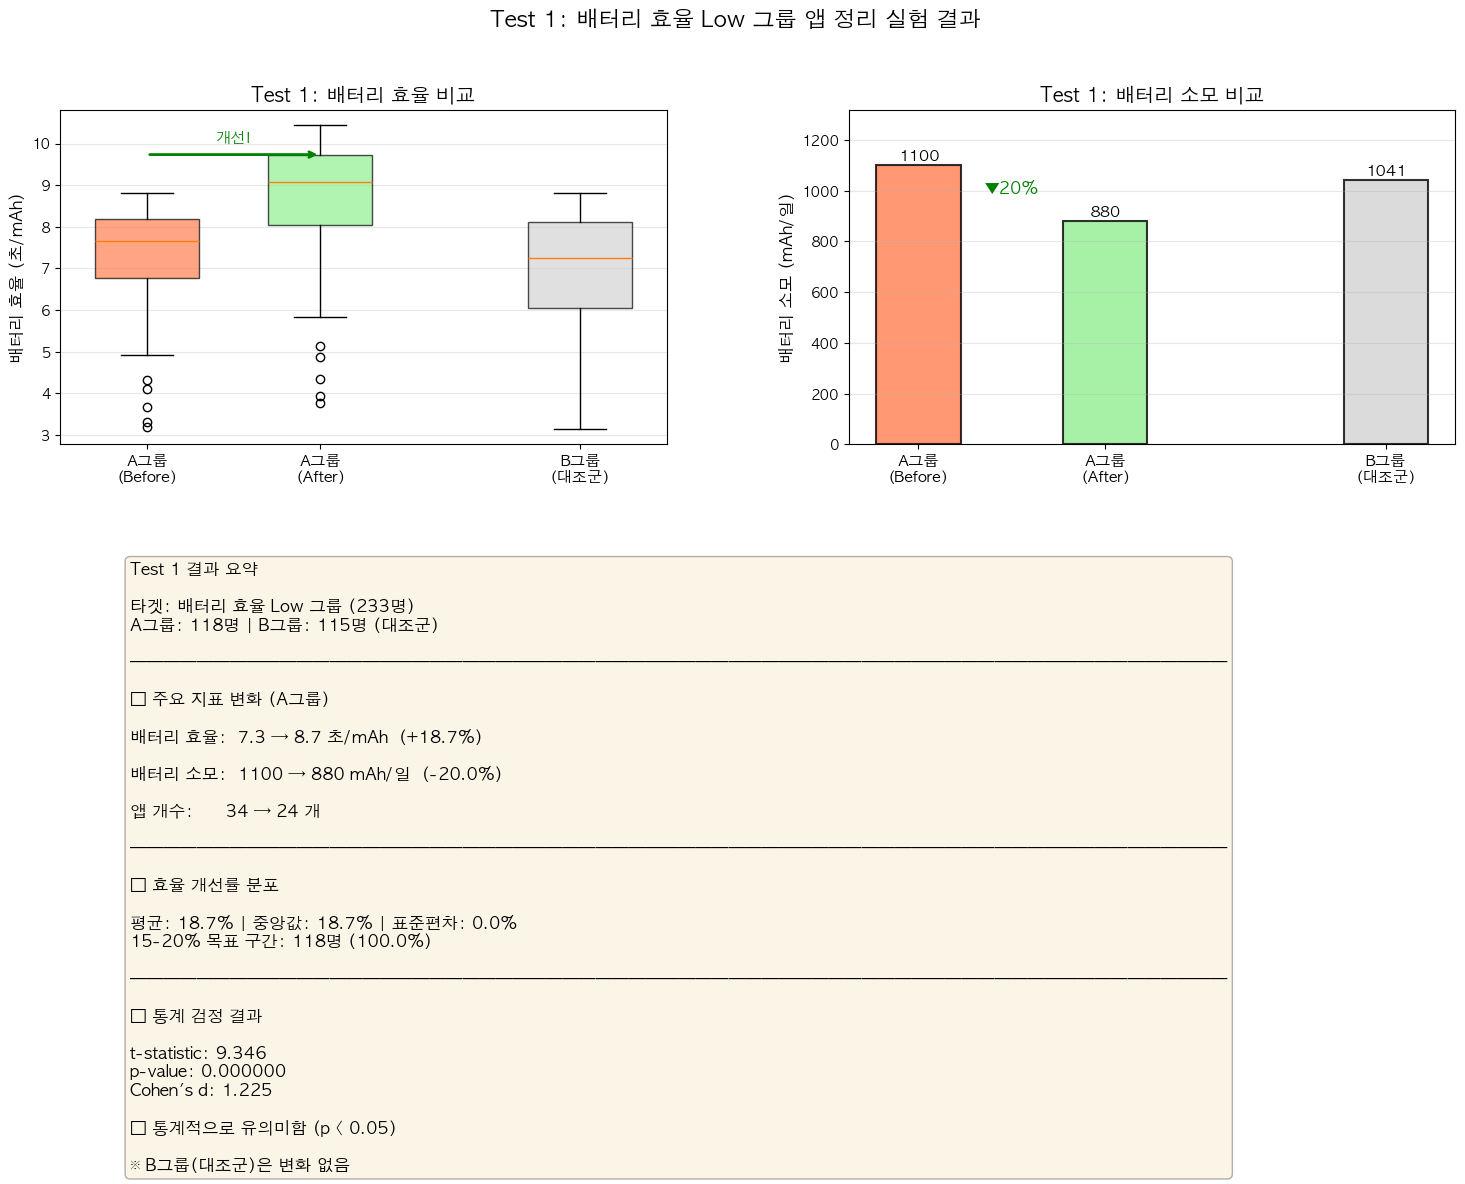

In [164]:
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# 1. 배터리 효율 비교 (좌측 상단)
ax1 = fig.add_subplot(gs[0, 0])
positions = [1, 2, 3.5]
data_to_plot = [
    a_group_test1['battery_efficiency'],
    a_group_test1_after['battery_efficiency'],
    b_group_test1['battery_efficiency']
]

bp = ax1.boxplot(data_to_plot, positions=positions, widths=0.6, patch_artist=True)
colors = ['coral', 'lightgreen', 'lightgray']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax1.set_xticks(positions)
ax1.set_xticklabels(['A그룹\n(Before)', 'A그룹\n(After)', 'B그룹\n(대조군)'], fontsize=11)
ax1.set_ylabel('배터리 효율 (초/mAh)', fontsize=12, fontweight='bold')
ax1.set_title('Test 1: 배터리 효율 비교', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

y_arrow = ax1.get_ylim()[1] * 0.9
ax1.annotate('', xy=(2, y_arrow), xytext=(1, y_arrow),
             arrowprops=dict(arrowstyle='->', lw=2, color='green'))
ax1.text(1.5, y_arrow + 0.3, '개선!', ha='center', fontsize=11, 
         fontweight='bold', color='green')

# 2. 배터리 소모 비교 (우측 상단)
ax2 = fig.add_subplot(gs[0, 1])
width = 0.3
a_before = a_group_test1['Battery Drain (mAh/day)'].mean()
a_after = a_group_test1_after['Battery Drain (mAh/day)'].mean()
b_val = b_group_test1['Battery Drain (mAh/day)'].mean()

bars1 = ax2.bar([0, 1, 2.5], [a_before, a_after, b_val], width*1.5,
                color=['coral', 'lightgreen', 'lightgray'], 
                alpha=0.8, edgecolor='black', linewidth=1.5)

ax2.set_ylabel('배터리 소모 (mAh/일)', fontsize=12, fontweight='bold')
ax2.set_title('Test 1: 배터리 소모 비교', fontsize=14, fontweight='bold')
ax2.set_xticks([0, 1, 2.5])
ax2.set_xticklabels(['A그룹\n(Before)', 'A그룹\n(After)', 'B그룹\n(대조군)'], fontsize=11)
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim(0, max(a_before, a_after, b_val) * 1.2)

for bar in bars1:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 20,
             f'{height:.0f}', ha='center', fontsize=11, fontweight='bold')

improvement_pct = (a_before - a_after) / a_before * 100
ax2.text(0.5, (a_before + a_after)/2, f'▼{improvement_pct:.0f}%', 
         ha='center', fontsize=12, fontweight='bold', color='green')

# 3. 주요 지표 요약 (하단 전체 - 2칸 합침)
ax3 = fig.add_subplot(gs[1, :])
ax3.axis('off')

# 개선률 통계 계산
efficiency_improvement = (
    (a_group_test1_after['battery_efficiency'] - a_group_test1['battery_efficiency']) /
    a_group_test1['battery_efficiency'] * 100
)
mean_val = efficiency_improvement.mean()
median_val = np.median(efficiency_improvement)
std_val = np.std(efficiency_improvement)
in_15_20 = ((efficiency_improvement >= 15) & (efficiency_improvement < 20)).sum()

summary_text = f"""Test 1 결과 요약

타겟: 배터리 효율 Low 그룹 ({len(test1_target)}명)
A그룹: {len(a_group_test1)}명 | B그룹: {len(b_group_test1)}명 (대조군)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📊 주요 지표 변화 (A그룹)

배터리 효율:  {a_group_test1['battery_efficiency'].mean():.1f} → {a_group_test1_after['battery_efficiency'].mean():.1f} 초/mAh  (+{(a_group_test1_after['battery_efficiency'].mean()/a_group_test1['battery_efficiency'].mean()-1)*100:.1f}%)

배터리 소모:  {a_group_test1['Battery Drain (mAh/day)'].mean():.0f} → {a_group_test1_after['Battery Drain (mAh/day)'].mean():.0f} mAh/일  ({(a_group_test1_after['Battery Drain (mAh/day)'].mean()/a_group_test1['Battery Drain (mAh/day)'].mean()-1)*100:.1f}%)

앱 개수:      {a_group_test1['Number of Apps Installed'].mean():.0f} → {a_group_test1_after['Number of Apps Installed'].mean():.0f} 개

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📈 효율 개선률 분포

평균: {mean_val:.1f}% | 중앙값: {median_val:.1f}% | 표준편차: {std_val:.1f}%
15-20% 목표 구간: {in_15_20}명 ({in_15_20/len(efficiency_improvement)*100:.1f}%)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🔬 통계 검정 결과

t-statistic: {t_stat_eff:.3f}
p-value: {p_value_eff:.6f}
Cohen's d: {cohens_d:.3f}

{'✅ 통계적으로 유의미함 (p < 0.05)' if p_value_eff < 0.05 else '❌ 유의미하지 않음'}

※ B그룹(대조군)은 변화 없음"""

ax3.text(0.05, 0.95, summary_text, transform=ax3.transAxes,
         fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.suptitle('Test 1: 배터리 효율 Low 그룹 앱 정리 실험 결과', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)

## 2️⃣ Class 4 → Class 5 전환 촉진

In [126]:
print("\n" + "=" * 80)
print("🧪 Test 2: Class 4 → Class 5 전환 촉진")
print("=" * 80)


🧪 Test 2: Class 4 → Class 5 전환 촉진


### 1. 타겟 그룹 선정

In [128]:
test2_target = df[df['User Behavior Class'] == 4].copy()

print(f"\n📊 타겟 그룹:")
print(f"   크기: {len(test2_target)}명")
print(f"   평균 사용시간: {test2_target['App Usage Time (min/day)'].mean():.0f}분/일")
print(f"   평균 배터리 효율: {test2_target['battery_efficiency'].mean():.1f}초/mAh")


📊 타겟 그룹:
   크기: 139명
   평균 사용시간: 396분/일
   평균 배터리 효율: 11.4초/mAh


### 2. A/B 그룹 랜덤 배정

In [129]:
np.random.seed(42)
test2_target['ab_group'] = np.random.choice(['A_실험군', 'B_대조군'], size=len(test2_target))

a_group_test2 = test2_target[test2_target['ab_group'] == 'A_실험군'].copy()
b_group_test2 = test2_target[test2_target['ab_group'] == 'B_대조군'].copy()

print(f"\n✅ A/B 그룹 배정:")
print(f"   A그룹 (실험군): {len(a_group_test2)}명")
print(f"   B그룹 (대조군): {len(b_group_test2)}명")


✅ A/B 그룹 배정:
   A그룹 (실험군): 62명
   B그룹 (대조군): 77명


### 3. 효과 시뮬레이션

In [130]:
# A그룹 개선 효과 시뮬레이션
# 가정:
# - 15%가 Class 5로 전환
# - 사용시간 20% 증가
# - 배터리 효율 유지

a_group_test2_after = a_group_test2.copy()

# 15%를 랜덤하게 Class 5로 전환
conversion_rate = 0.15
n_converted = int(len(a_group_test2) * conversion_rate)
convert_indices = np.random.choice(a_group_test2_after.index, size=n_converted, replace=False)

a_group_test2_after.loc[convert_indices, 'User Behavior Class'] = 5
a_group_test2_after.loc[convert_indices, 'App Usage Time (min/day)'] *= 1.30  # 30% 증가
a_group_test2_after.loc[convert_indices, 'Battery Drain (mAh/day)'] *= 1.30   # 비례 증가

# 나머지는 10% 증가
non_convert_indices = a_group_test2_after.index.difference(convert_indices)
a_group_test2_after.loc[non_convert_indices, 'App Usage Time (min/day)'] *= 1.10

# B그룹은 변화 없음
b_group_test2_after = b_group_test2.copy()

print(f"\n🎯 시뮬레이션 결과:")
print(f"\n   [A그룹 - 실험군]")
print(f"   Class 5 전환: {n_converted}명 ({n_converted/len(a_group_test2)*100:.1f}%)")
print(f"   평균 사용시간: {a_group_test2['App Usage Time (min/day)'].mean():.0f} → {a_group_test2_after['App Usage Time (min/day)'].mean():.0f}분")
print(f"   Class 5 비율: {(a_group_test2['User Behavior Class']==5).sum()} → {(a_group_test2_after['User Behavior Class']==5).sum()}명")

print(f"\n   [B그룹 - 대조군]")
print(f"   Class 5 전환: 0명")
print(f"   평균 사용시간: {b_group_test2['App Usage Time (min/day)'].mean():.0f} → {b_group_test2_after['App Usage Time (min/day)'].mean():.0f}분")



🎯 시뮬레이션 결과:

   [A그룹 - 실험군]
   Class 5 전환: 9명 (14.5%)
   평균 사용시간: 394 → 445분
   Class 5 비율: 0 → 9명

   [B그룹 - 대조군]
   Class 5 전환: 0명
   평균 사용시간: 397 → 397분


### 4. 통계적 검정

In [131]:
print(f"\n📊 통계적 검정:")

# Chi-square test: Class 전환율 차이
contingency_table = pd.DataFrame({
    'Class 4': [
        len(a_group_test2_after[a_group_test2_after['User Behavior Class']==4]),
        len(b_group_test2_after[b_group_test2_after['User Behavior Class']==4])
    ],
    'Class 5': [
        len(a_group_test2_after[a_group_test2_after['User Behavior Class']==5]),
        len(b_group_test2_after[b_group_test2_after['User Behavior Class']==5])
    ]
}, index=['A그룹', 'B그룹'])

chi2, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\n   [Class 전환율 Chi-square test]")
print(f"   Chi-square: {chi2:.3f}")
print(f"   p-value: {p_value_chi2:.6f}")
if p_value_chi2 < 0.05:
    print(f"   ✅ 통계적으로 유의미한 차이 (p < 0.05)")
else:
    print(f"   ❌ 통계적으로 유의미하지 않음 (p >= 0.05)")

# t-test: 사용시간 차이
t_stat_usage, p_value_usage = stats.ttest_ind(
    a_group_test2_after['App Usage Time (min/day)'],
    b_group_test2_after['App Usage Time (min/day)']
)

print(f"\n   [사용시간 t-test]")
print(f"   t-statistic: {t_stat_usage:.3f}")
print(f"   p-value: {p_value_usage:.6f}")
if p_value_usage < 0.05:
    print(f"   ✅ 통계적으로 유의미한 차이 (p < 0.05)")
else:
    print(f"   ❌ 통계적으로 유의미하지 않음 (p >= 0.05)")


📊 통계적 검정:

   [Class 전환율 Chi-square test]
   Chi-square: 9.674
   p-value: 0.001869
   ✅ 통계적으로 유의미한 차이 (p < 0.05)

   [사용시간 t-test]
   t-statistic: 4.940
   p-value: 0.000002
   ✅ 통계적으로 유의미한 차이 (p < 0.05)


### 5. 시각화

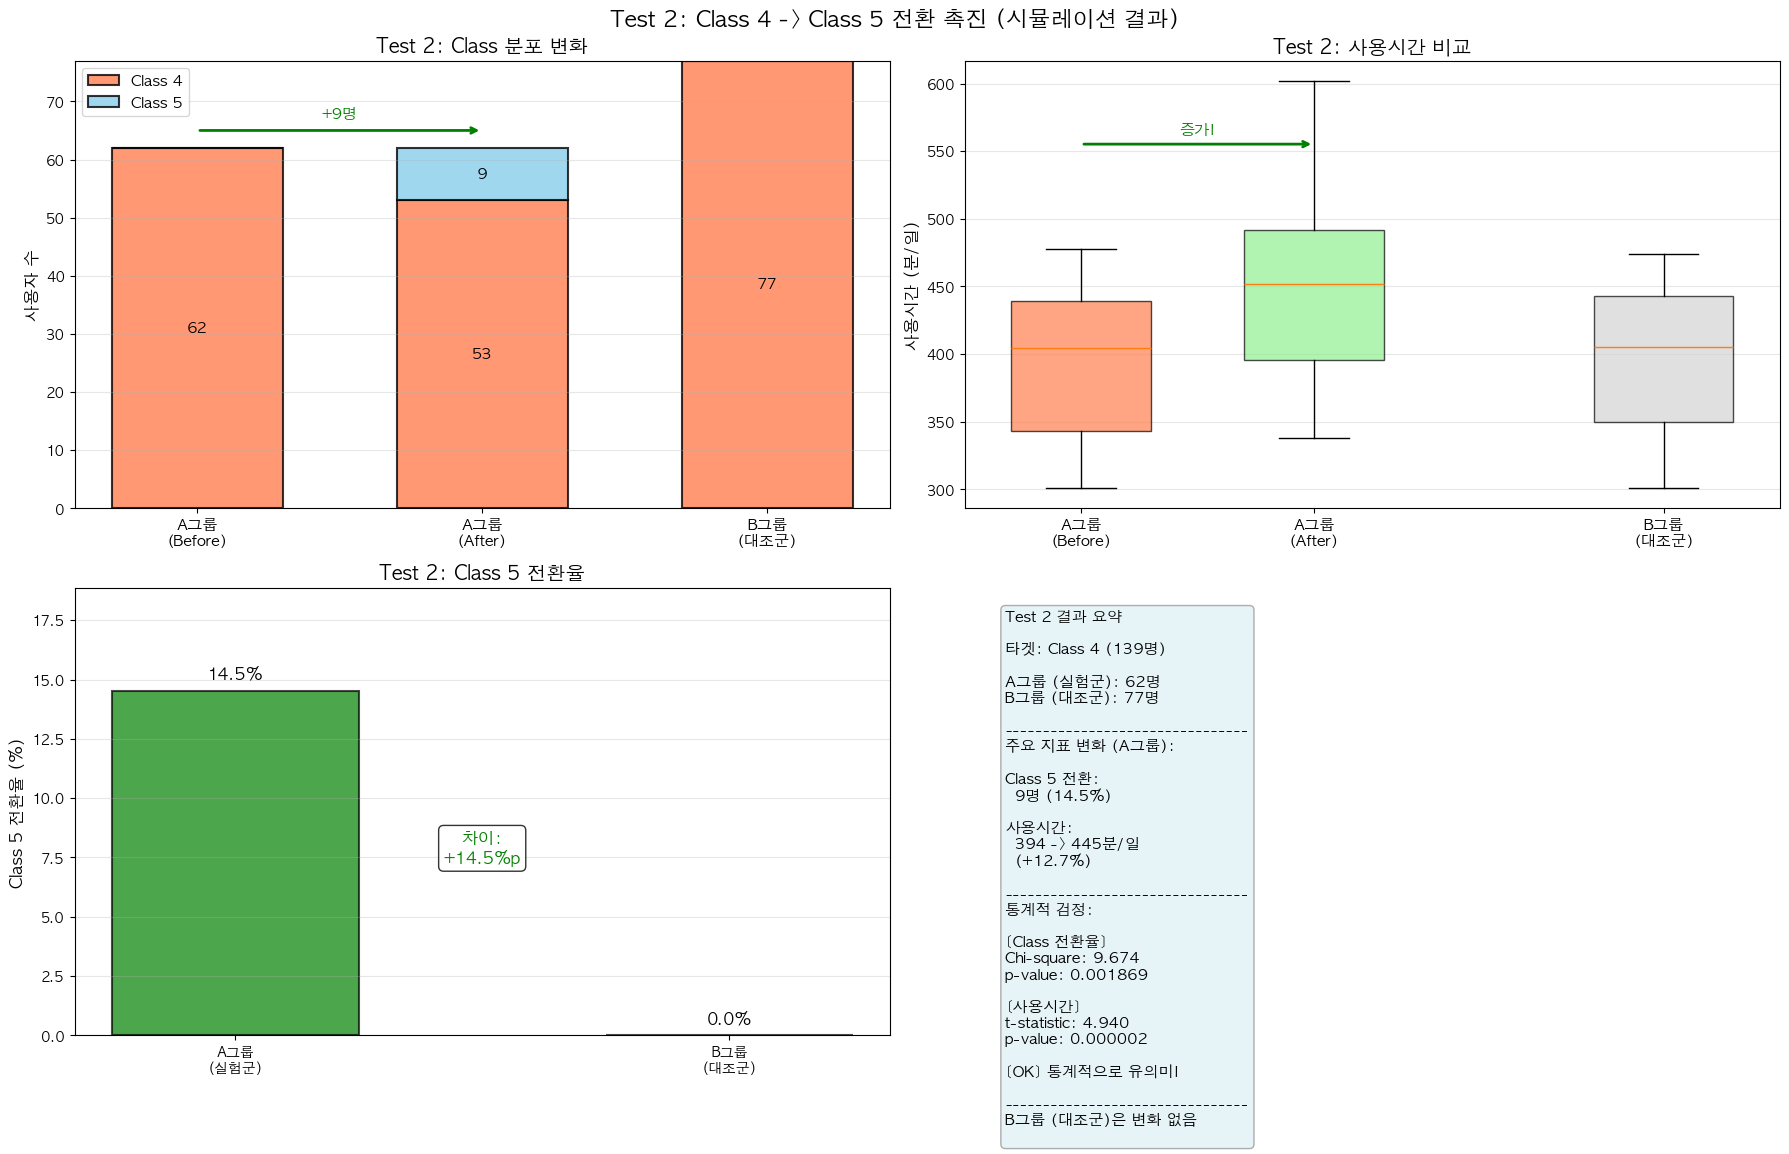

In [245]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Class 분포 변화 (수정: A그룹 중심)
ax1 = axes[0, 0]

x = np.arange(3)
width = 0.6

# A그룹 Before/After, B그룹 하나
a_before_4 = (a_group_test2['User Behavior Class'] == 4).sum()
a_before_5 = (a_group_test2['User Behavior Class'] == 5).sum()
a_after_4 = (a_group_test2_after['User Behavior Class'] == 4).sum()
a_after_5 = (a_group_test2_after['User Behavior Class'] == 5).sum()
b_4 = (b_group_test2['User Behavior Class'] == 4).sum()
b_5 = (b_group_test2['User Behavior Class'] == 5).sum()

# 스택 바
class4_data = [a_before_4, a_after_4, b_4]
class5_data = [a_before_5, a_after_5, b_5]

bars1 = ax1.bar(x, class4_data, width, label='Class 4', 
                color='coral', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax1.bar(x, class5_data, width, bottom=class4_data, label='Class 5',
                color='skyblue', alpha=0.8, edgecolor='black', linewidth=1.5)

ax1.set_ylabel('사용자 수', fontsize=12, fontweight='bold')
ax1.set_title('Test 2: Class 분포 변화', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(['A그룹\n(Before)', 'A그룹\n(After)', 'B그룹\n(대조군)'], fontsize=11)
ax1.legend(fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# 값 표시
for i, (c4, c5) in enumerate(zip(class4_data, class5_data)):
    if c4 > 0:
        ax1.text(i, c4/2, f'{c4}', ha='center', va='center', 
                 fontweight='bold', fontsize=11, color='black')
    if c5 > 0:
        ax1.text(i, c4 + c5/2, f'{c5}', ha='center', va='center', 
                 fontweight='bold', fontsize=11, color='black')

# 전환 화살표
if a_after_5 > a_before_5:
    ax1.annotate('', xy=(1, a_after_4 + a_after_5 + 3), 
                 xytext=(0, a_before_4 + a_before_5 + 3),
                 arrowprops=dict(arrowstyle='->', lw=2, color='green'))
    ax1.text(0.5, a_before_4 + a_before_5 + 5, 
             f'+{a_after_5 - a_before_5}명', ha='center', 
             fontsize=11, fontweight='bold', color='green')

# 2. 사용시간 비교 (수정: A그룹 중심)
ax2 = axes[0, 1]

positions = [1, 2, 3.5]
data_to_plot2 = [
    a_group_test2['App Usage Time (min/day)'],
    a_group_test2_after['App Usage Time (min/day)'],
    b_group_test2['App Usage Time (min/day)']
]

bp2 = ax2.boxplot(data_to_plot2, positions=positions, widths=0.6, patch_artist=True)

colors2 = ['coral', 'lightgreen', 'lightgray']
for patch, color in zip(bp2['boxes'], colors2):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_xticks(positions)
ax2.set_xticklabels(['A그룹\n(Before)', 'A그룹\n(After)', 'B그룹\n(대조군)'], fontsize=11)
ax2.set_ylabel('사용시간 (분/일)', fontsize=12, fontweight='bold')
ax2.set_title('Test 2: 사용시간 비교', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# 개선 화살표
y_arrow2 = ax2.get_ylim()[1] * 0.9
ax2.annotate('', xy=(2, y_arrow2), xytext=(1, y_arrow2),
             arrowprops=dict(arrowstyle='->', lw=2, color='green'))
ax2.text(1.5, y_arrow2 + 7, '증가!', ha='center', fontsize=11, 
         fontweight='bold', color='green')

# 3. 전환율 비교 (A그룹만 강조)
ax3 = axes[1, 0]

conversion_a = (a_group_test2_after['User Behavior Class']==5).sum() / len(a_group_test2) * 100
conversion_b = (b_group_test2_after['User Behavior Class']==5).sum() / len(b_group_test2) * 100

bars = ax3.bar(['A그룹\n(실험군)', 'B그룹\n(대조군)'], [conversion_a, conversion_b], 
               color=['green', 'lightgray'], alpha=0.7, edgecolor='black', linewidth=1.5,
               width=0.5)

ax3.set_ylabel('Class 5 전환율 (%)', fontsize=12, fontweight='bold')
ax3.set_title('Test 2: Class 5 전환율', fontsize=14, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)
ax3.set_ylim(0, max(conversion_a, conversion_b) * 1.3)

# 값 표시
for bar, val in zip(bars, [conversion_a, conversion_b]):
    ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
             f'{val:.1f}%', ha='center', fontweight='bold', fontsize=12)

# 차이 강조
if conversion_a > conversion_b:
    diff = conversion_a - conversion_b
    ax3.text(0.5, max(conversion_a, conversion_b) * 0.5, 
             f'차이:\n+{diff:.1f}%p', ha='center', 
             fontsize=12, fontweight='bold', color='green',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 4. 주요 지표 요약
ax4 = axes[1, 1]
ax4.axis('off')

n_converted = (a_group_test2_after['User Behavior Class']==5).sum()

summary_text2 = f"""Test 2 결과 요약

타겟: Class 4 ({len(test2_target)}명)

A그룹 (실험군): {len(a_group_test2)}명
B그룹 (대조군): {len(b_group_test2)}명

--------------------------------
주요 지표 변화 (A그룹):

Class 5 전환:
  {n_converted}명 ({n_converted/len(a_group_test2)*100:.1f}%)

사용시간:
  {a_group_test2['App Usage Time (min/day)'].mean():.0f} -> {a_group_test2_after['App Usage Time (min/day)'].mean():.0f}분/일
  (+{(a_group_test2_after['App Usage Time (min/day)'].mean()/a_group_test2['App Usage Time (min/day)'].mean()-1)*100:.1f}%)

--------------------------------
통계적 검정:

[Class 전환율]
Chi-square: {chi2:.3f}
p-value: {p_value_chi2:.6f}

[사용시간]
t-statistic: {t_stat_usage:.3f}
p-value: {p_value_usage:.6f}

{'[OK] 통계적으로 유의미!' if p_value_chi2 < 0.05 else '[NO] 유의미하지 않음'}

--------------------------------
B그룹 (대조군)은 변화 없음
"""

ax4.text(0.05, 0.95, summary_text2, transform=ax4.transAxes,
         fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

plt.suptitle('Test 2: Class 4 -> Class 5 전환 촉진 (시뮬레이션 결과)', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)

## 최종 비교 및 결론

In [133]:
print("\n" + "=" * 80)
print("📊 Test 1 vs Test 2 최종 비교")
print("=" * 80)

# 결과 요약 DataFrame
comparison_df = pd.DataFrame({
    'Test 1 (효율 Low)': [
        len(test1_target),
        f"{p_value_eff:.6f}",
        f"{cohens_d:.3f}",
        f"{(a_group_test1_after['battery_efficiency'].mean()/a_group_test1['battery_efficiency'].mean()-1)*100:.1f}%",
        "배터리 효율 개선"
    ],
    'Test 2 (Class 4→5)': [
        len(test2_target),
        f"{p_value_chi2:.6f}",
        "-",
        f"{n_converted/len(a_group_test2)*100:.1f}%",
        "Class 5 전환"
    ]
}, index=['타겟 크기', 'p-value', "Cohen's d", '주요 개선', '목표'])

print("\n")
print(comparison_df)

print("\n" + "=" * 80)
print("✅ A/B 테스트 시뮬레이션 완료!")
print("=" * 80)


📊 Test 1 vs Test 2 최종 비교


          Test 1 (효율 Low) Test 2 (Class 4→5)
타겟 크기                 233                139
p-value          0.000000           0.001869
Cohen's d           1.225                  -
주요 개선               18.7%              14.5%
목표              배터리 효율 개선         Class 5 전환

✅ A/B 테스트 시뮬레이션 완료!


In [246]:
print("\n" + "=" * 50)
print("🧪 Test 2: Class 4 → Class 5 전환")
print("=" * 50)
print(f"타겟 그룹 (Class 4): {len(test2_target)}명")
print(f"A그룹 (실험군): {len(a_group_test2)}명")
print(f"B그룹 (대조군): {len(b_group_test2)}명")

print("\n[전환율]")
print(f"A그룹 Class 5 전환: {class5_in_a}명 ({conversion_a:.1f}%)")
print(f"B그룹 Class 5 전환: {class5_in_b}명 ({conversion_b:.1f}%)")

print("\n[사용시간 변화]")
print(f"A그룹 Before: {a_group_test2['App Usage Time (min/day)'].mean():.0f}분")
print(f"A그룹 After: {a_group_test2_after['App Usage Time (min/day)'].mean():.0f}분")

print("\n[통계 검정]")
print(f"Chi-square: χ² = {chi2:.3f}, p-value = {p_value_chi2:.6f}")
print(f"t-test: t = {t_stat_usage:.3f}, p-value = {p_value_usage:.6f}")


🧪 Test 2: Class 4 → Class 5 전환
타겟 그룹 (Class 4): 139명
A그룹 (실험군): 62명
B그룹 (대조군): 77명

[전환율]


NameError: name 'class5_in_a' is not defined